#Imports and data loading

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# full dataset view
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode, plot
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

#1. Preparation and analysis of chosen data

#About dataset

https://www.kaggle.com/datasets/saranyaponnarasu/bank-marketing-term-deposits-classification/data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

In [3]:
''' Read in the whole dataset '''
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_deposit.csv");
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_deposit.csv");

# df = pd.concat([df_train, df_test], sort=False)

In [4]:
# df.head()
df_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
df_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df_train.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [ ]:
df_test.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [ ]:
df_train.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [ ]:
df_test.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [ ]:
df_train.shape

(45211, 17)

In [ ]:
df_test.shape

(4521, 17)

In [6]:
df_train['y'].unique(), df_test['y'].unique()

(array(['no', 'yes'], dtype=object), array(['no', 'yes'], dtype=object))

In [ ]:
df_train.job.unique(), df_test.job.unique()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object))

In [ ]:
df_train.education.unique(), df_test.education.unique()

(array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object))

In [7]:
''' Get duplicates number '''
df_train.duplicated().sum(), df_test.duplicated().sum()

(np.int64(0), np.int64(0))

#The description of columns:

1 - **age** (numeric)

2 - **job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - **education** (categorical: "unknown","secondary","primary","tertiary")


5 - **default**: has credit in default? (binary: "yes","no")

6 - **balance**: average yearly balance, in euros (numeric)

7 - **housing**: has housing loan? (binary: "yes","no")

8 - **loan**: has personal loan? (binary: "yes","no")

9 - **contact**: contact communication type (categorical: "unknown","telephone","cellular")

10 - **day**: last contact day of the month (numeric)

11 - **month**: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - **duration**: last contact duration, in seconds (numeric)

13 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - **previous**: number of contacts performed before this campaign and for this client (numeric)

16 - **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

.

17 - **y** - has the client subscribed a term deposit? (binary: "yes","no")



#2. Input and Output

**Input**: "age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "poutcome","previous"


**Output**: "y"

#3. Dependence of input/output

In [ ]:
df_train.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
5  unknown    5   may       139         1     -1         0  unknown  no  
6  unknown    5   may       217         1     -1         0  unknown  no  
7  unknown    5   may       380         1     -1         0  unknown  no  
8  unknown    5   may        50         1     -1         0  unknown  no  
9  unknown    5   may        55         1     -1         0  unknown  no

In [ ]:
df_test.head(10)

age            job  marital  education default  balance housing loan  \
0   30     unemployed  married    primary      no     1787      no   no   
1   33       services  married  secondary      no     4789     yes  yes   
2   35     management   single   tertiary      no     1350     yes   no   
3   30     management  married   tertiary      no     1476     yes  yes   
4   59    blue-collar  married  secondary      no        0     yes   no   
5   35     management   single   tertiary      no      747      no   no   
6   36  self-employed  married   tertiary      no      307     yes   no   
7   39     technician  married  secondary      no      147     yes   no   
8   41   entrepreneur  married   tertiary      no      221     yes   no   
9   43       services  married    primary      no      -88     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
5  cellular   23   feb       141         2    176         3  failure  no  
6  cellular   14   may       341         1    330         2    other  no  
7  cellular    6   may       151         2     -1         0  unknown  no  
8   unknown   14   may        57         2     -1         0  unknown  no  
9  cellular   17   apr       313         1    147         2  failure  no

Lets take a look at object columns

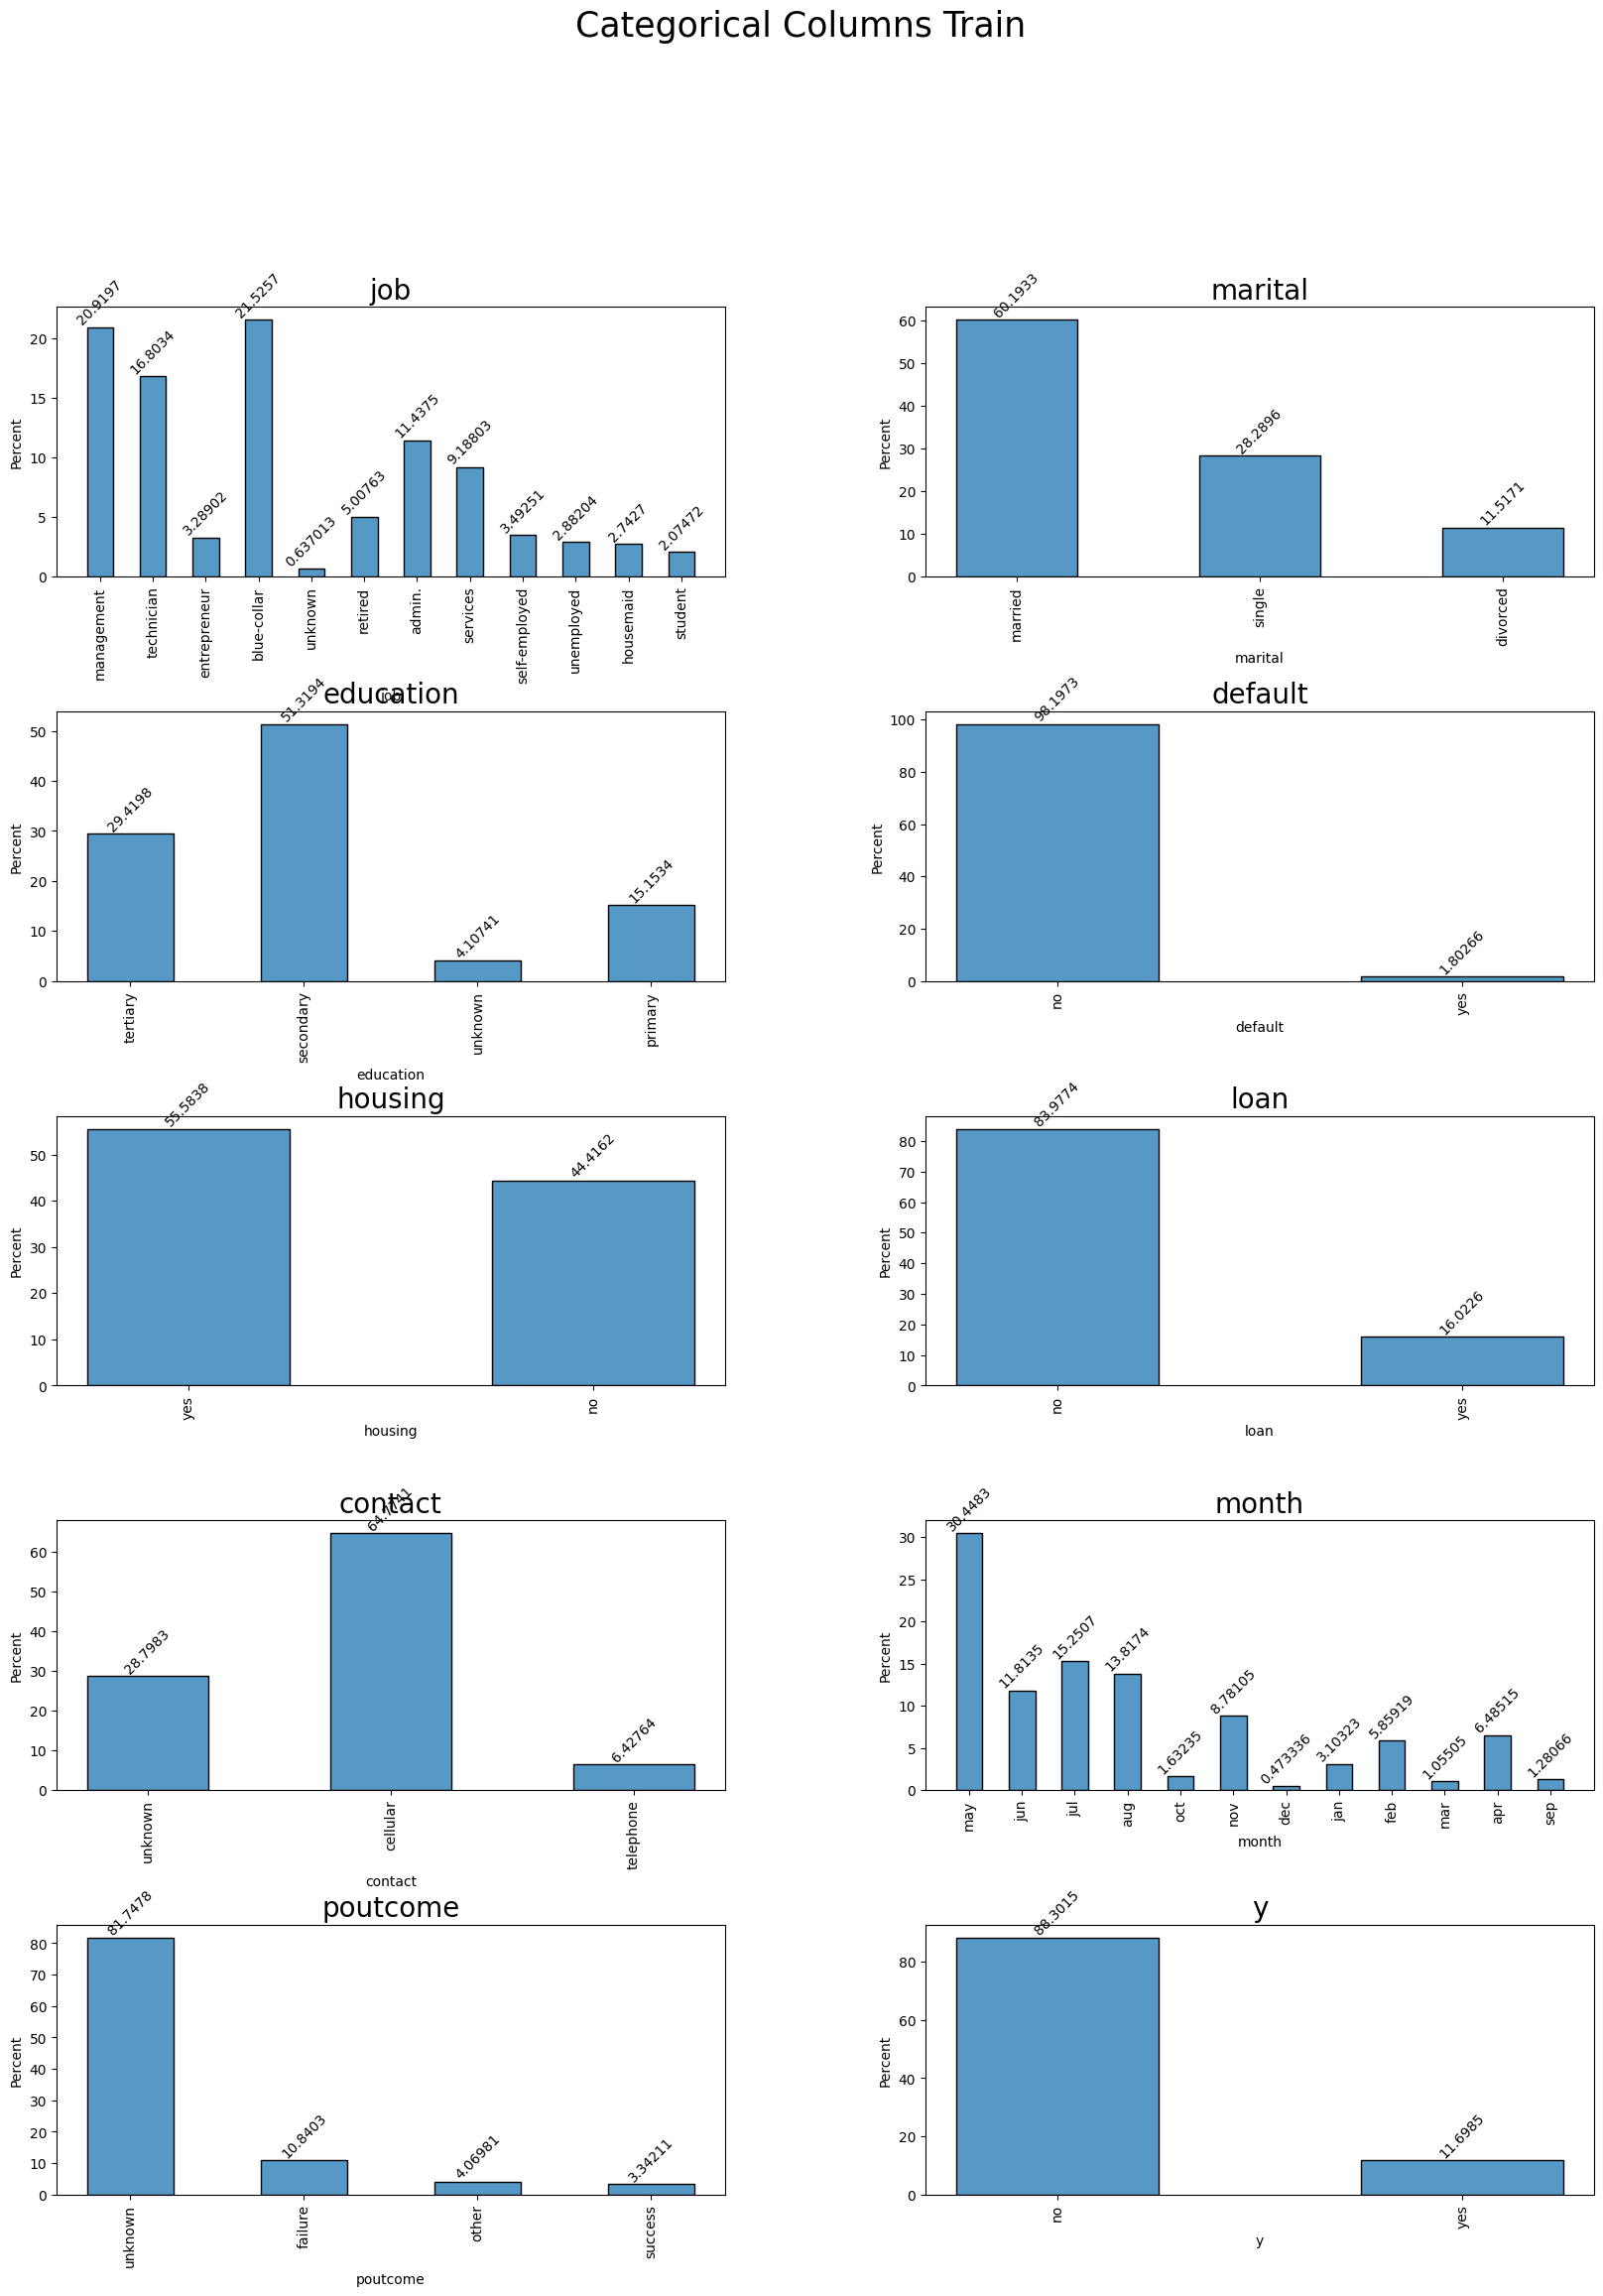

In [ ]:
cat_cols = df_train.select_dtypes(include="object").columns

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Train", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

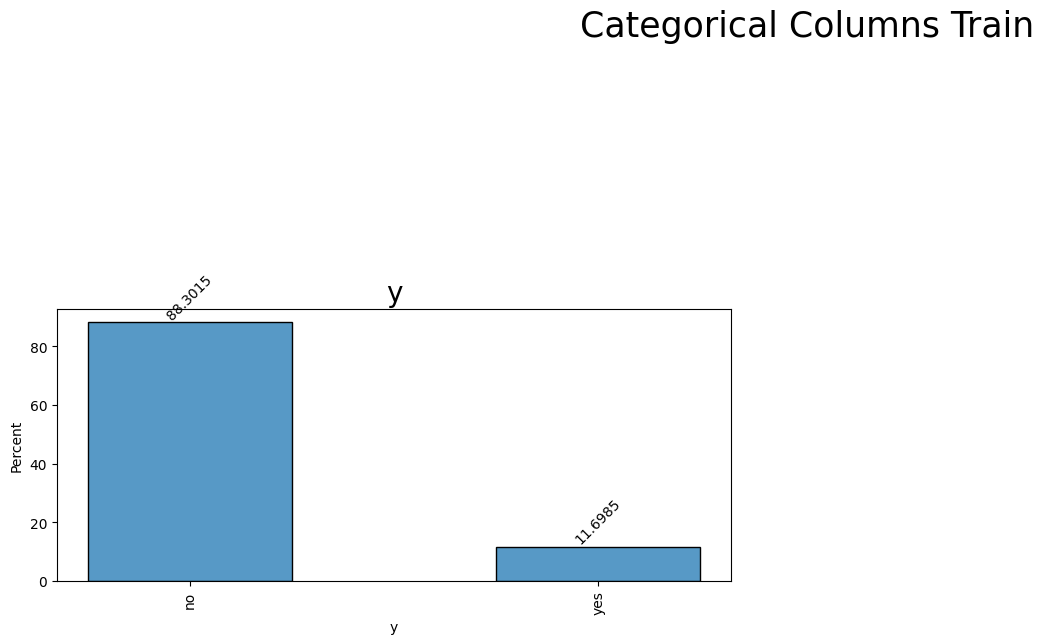

In [ ]:
cat_cols = df_train.select_dtypes(include="object").columns

cols = ['y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Train", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

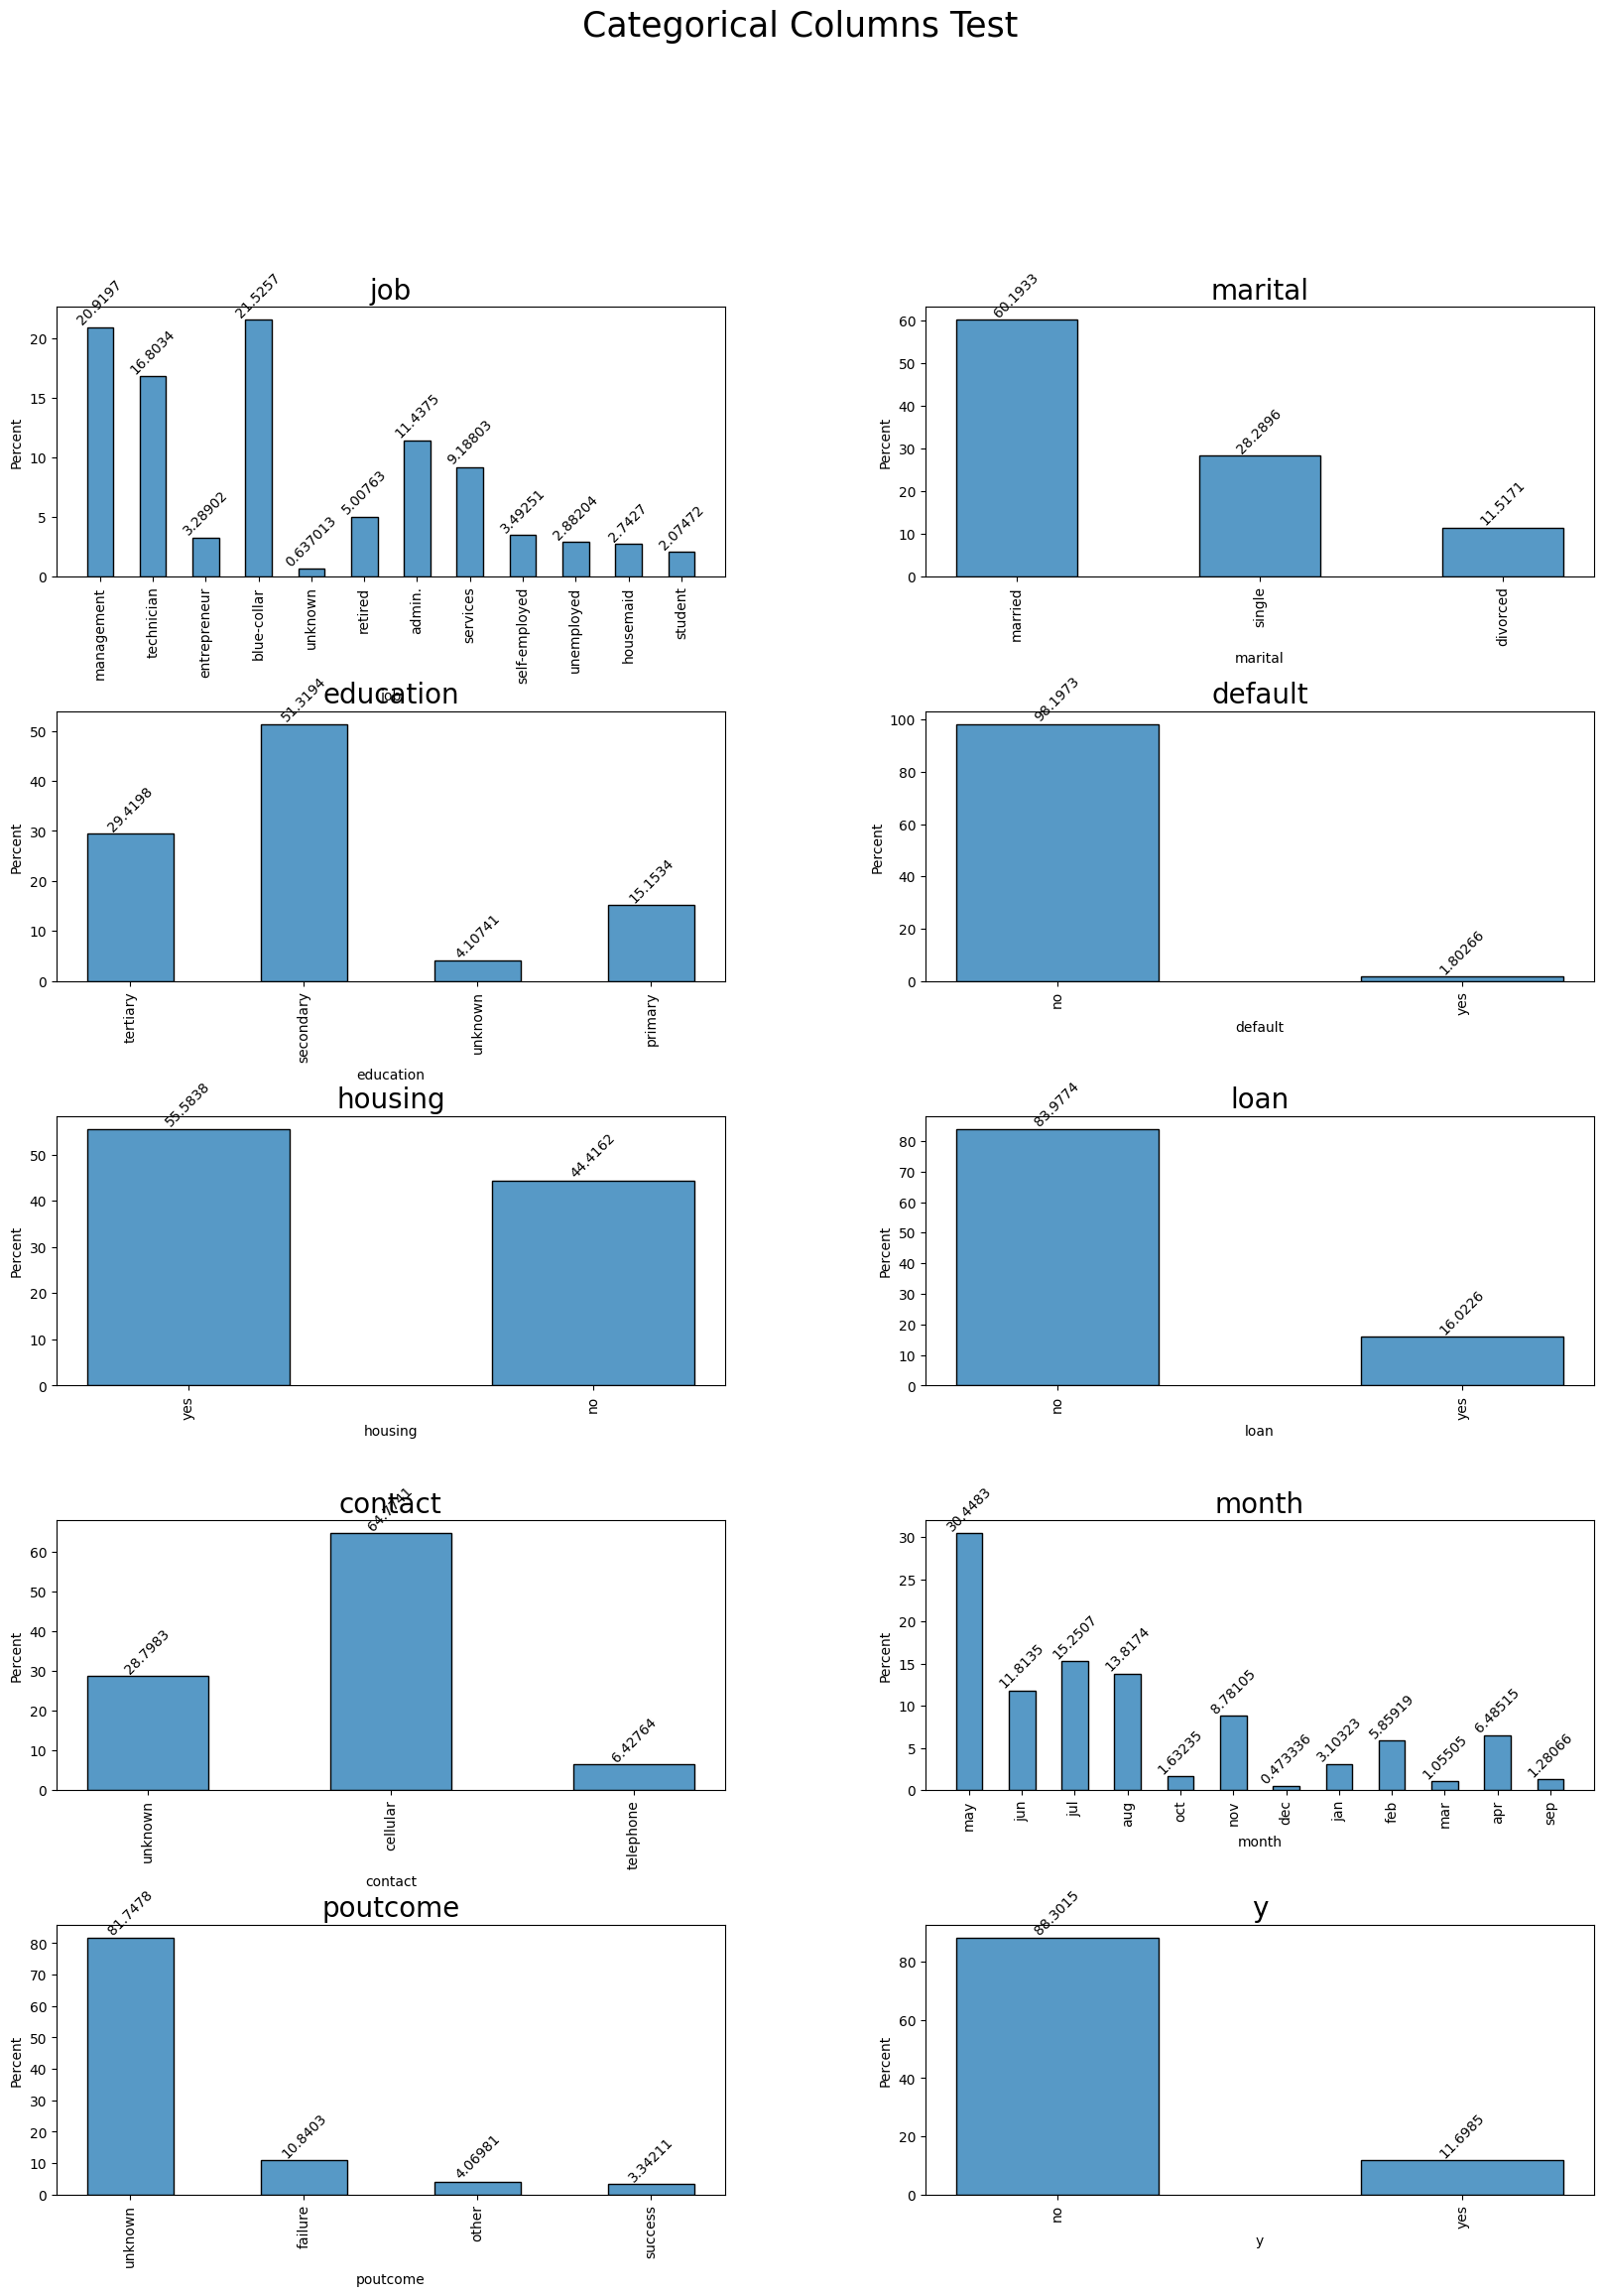

In [ ]:
cat_cols = df_test.select_dtypes(include="object").columns

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Test", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

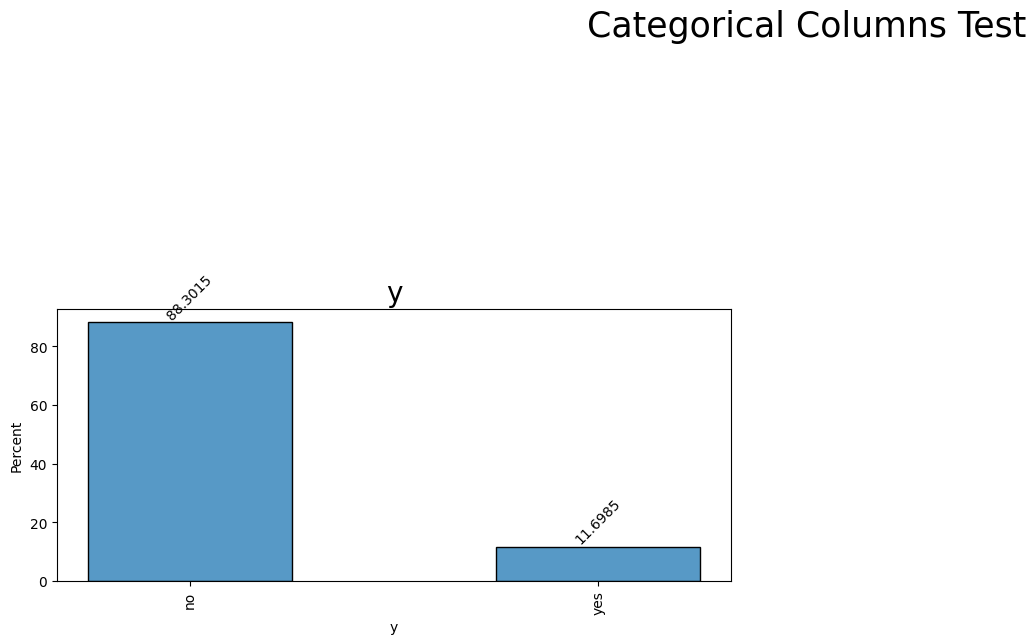

In [ ]:
cat_cols = df_test.select_dtypes(include="object").columns

cols = ['y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Test", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

Now lets visualise numeric columns

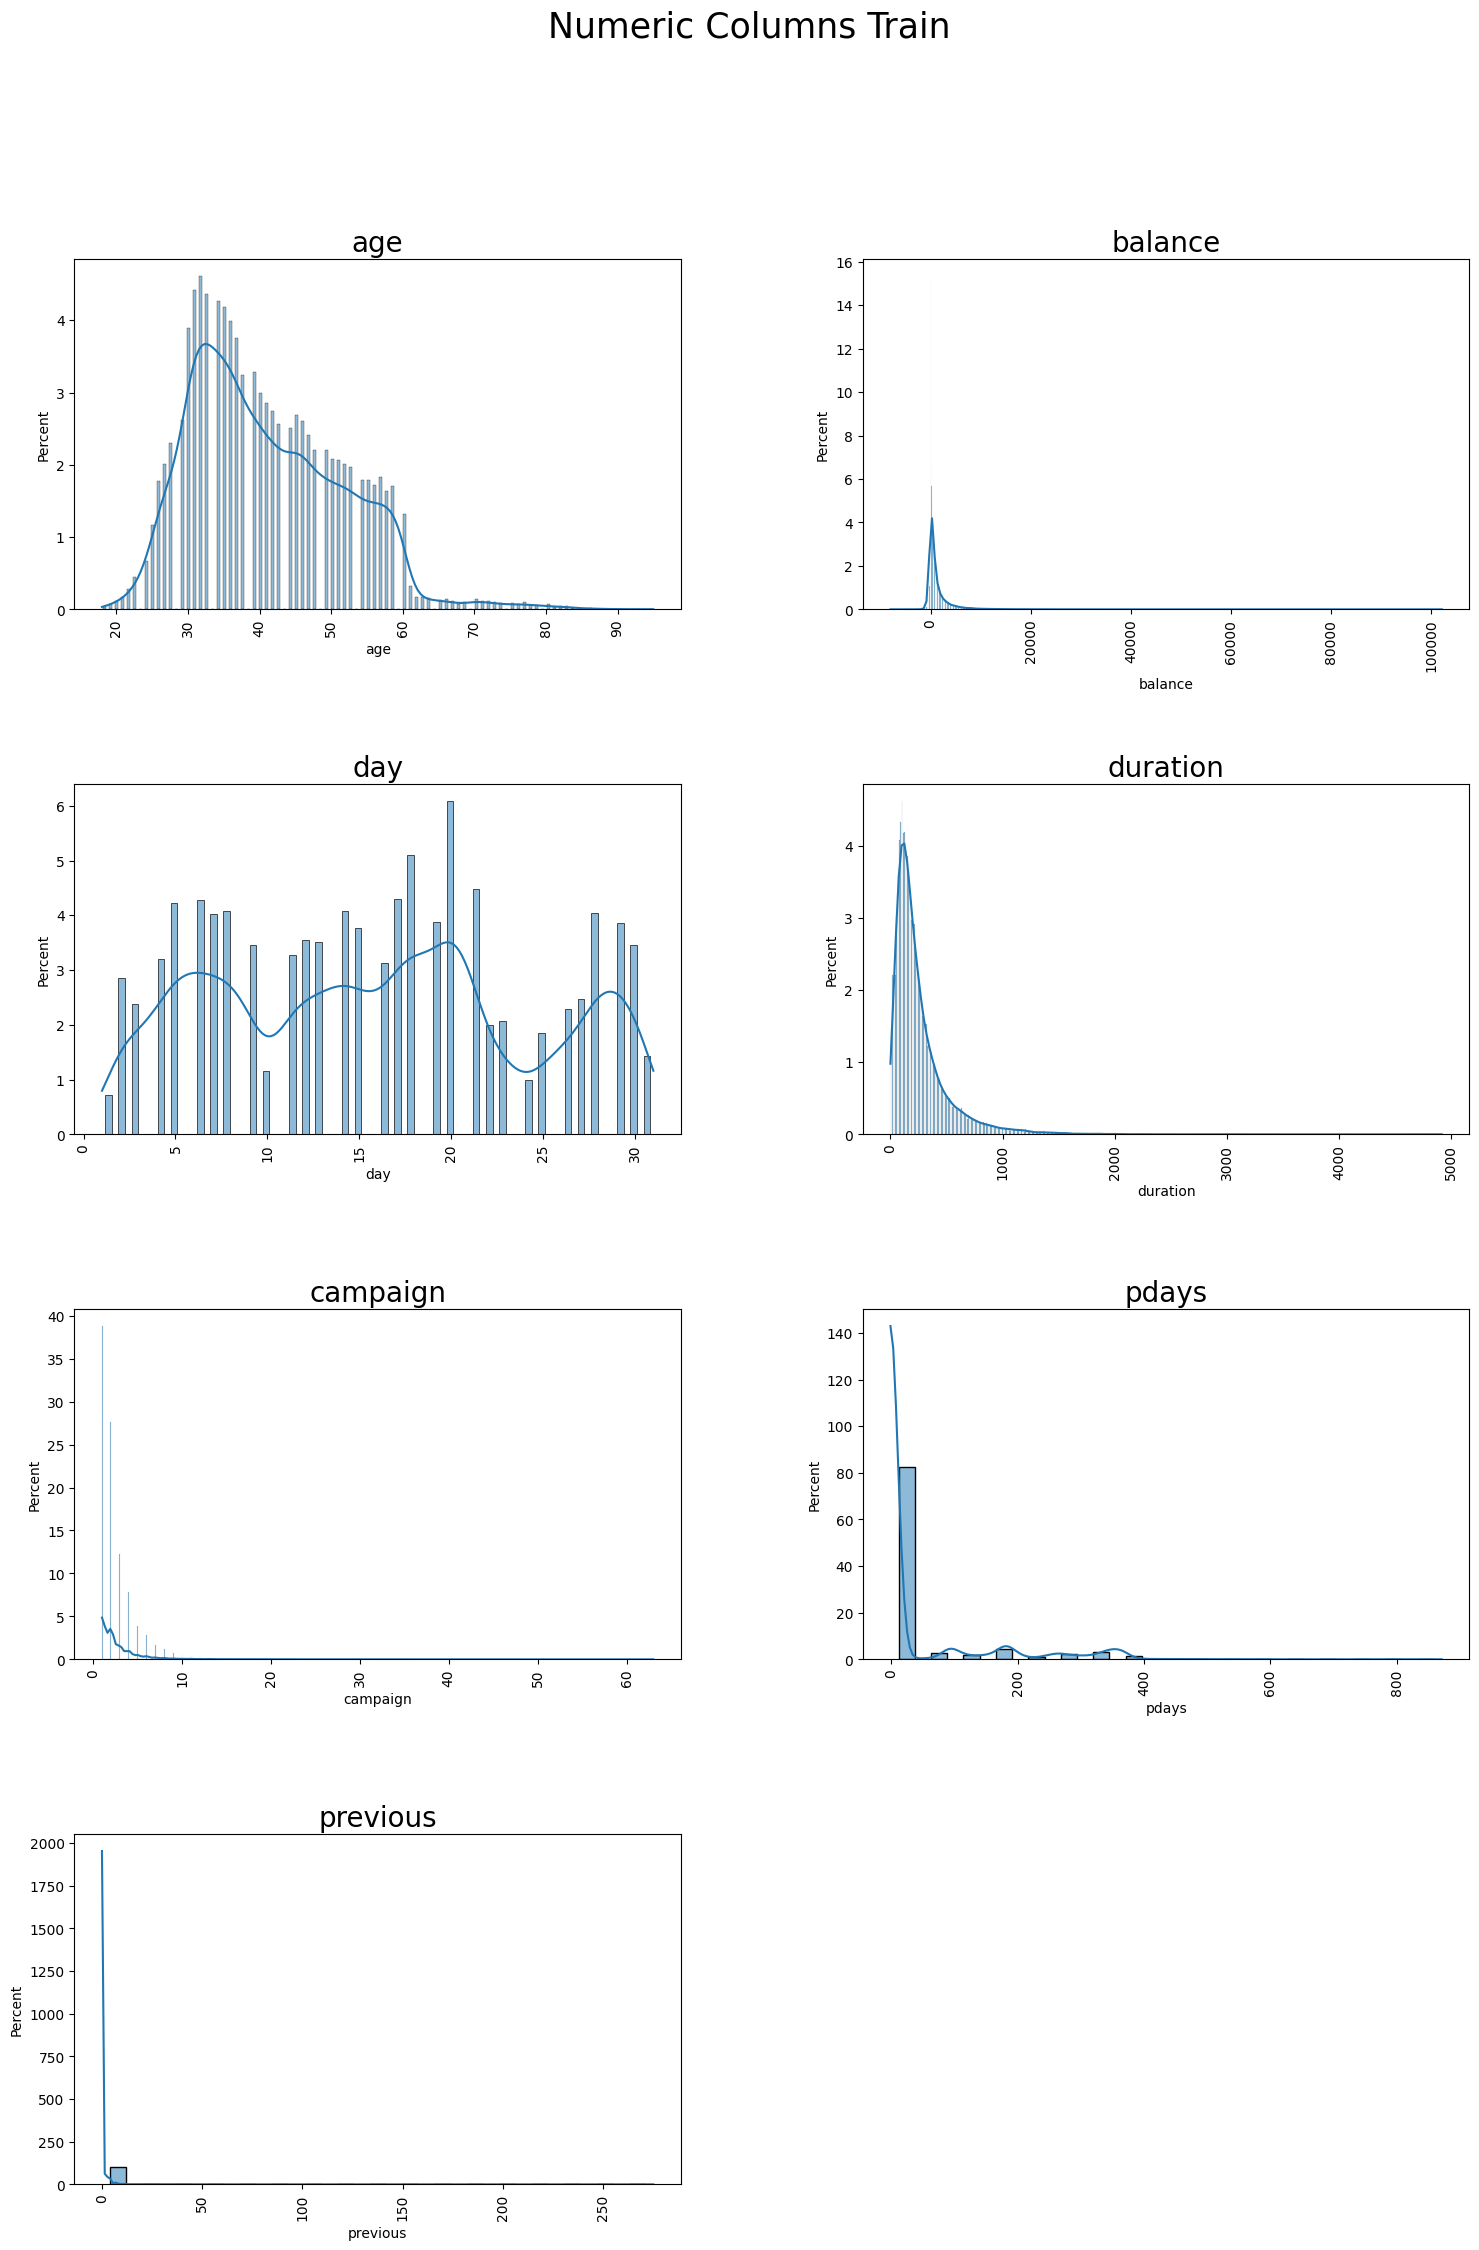

In [ ]:
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Numeric Columns Train", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(4, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent", kde=True)

    plt.xticks(rotation=90)

plt.show()

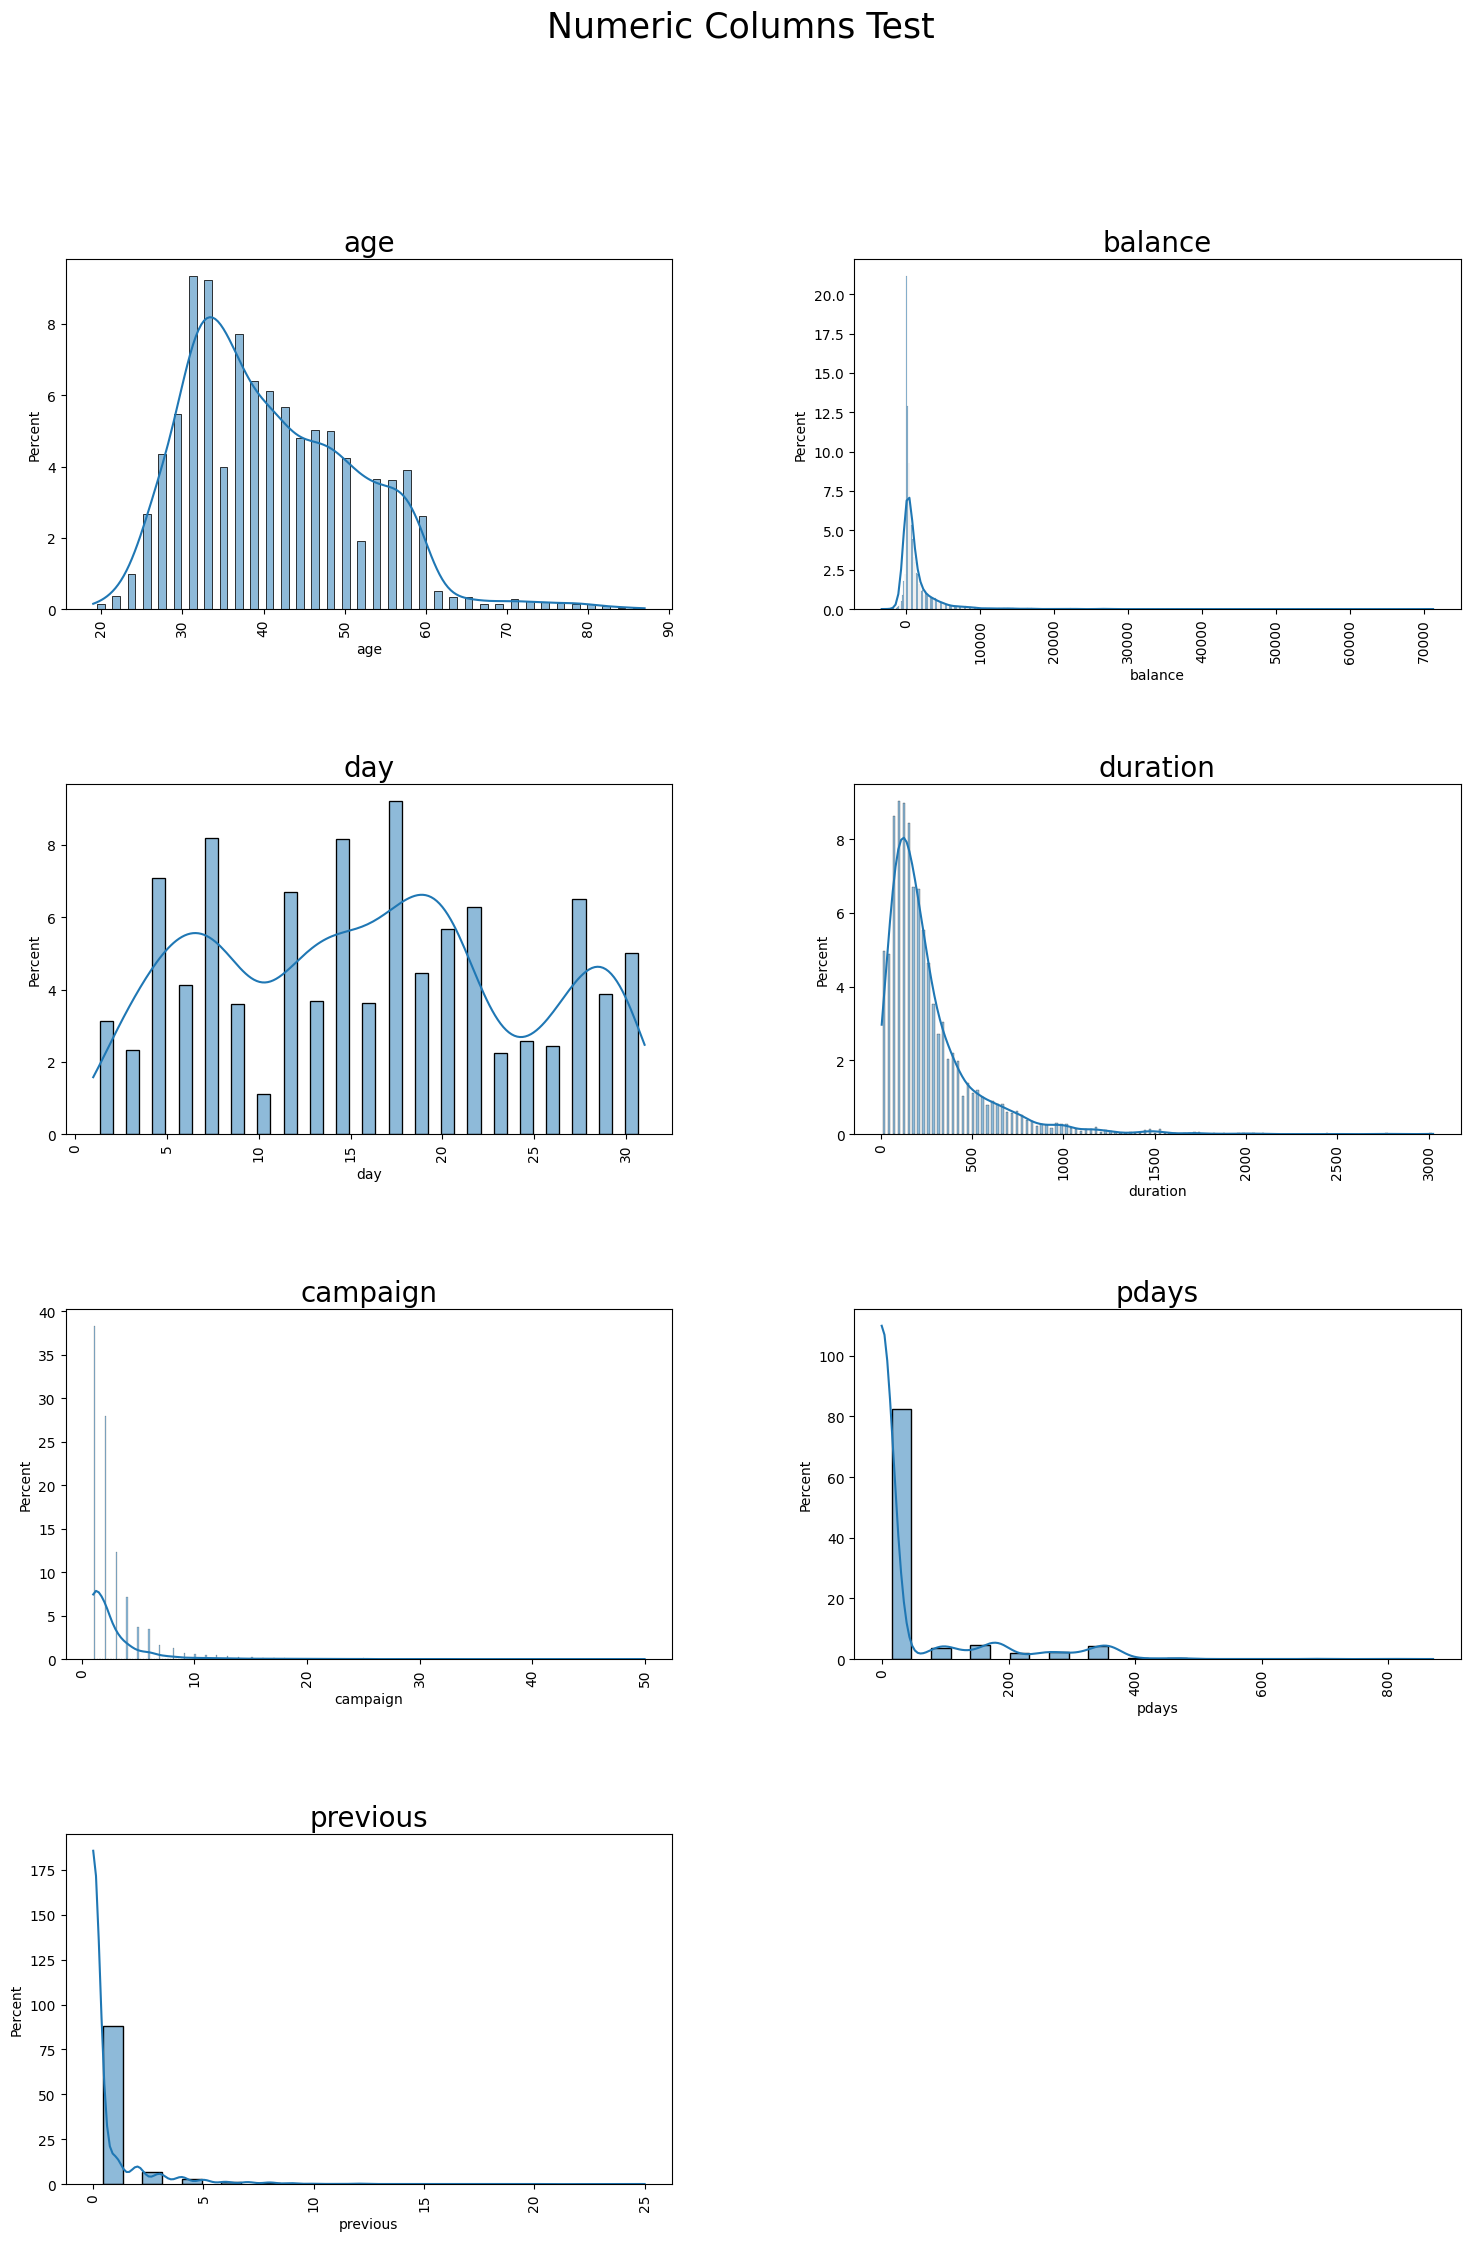

In [ ]:
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Numeric Columns Test", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(4, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_test, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent", kde=True)

    plt.xticks(rotation=90)

plt.show()

In [9]:
label_encoder = LabelEncoder()
df_train['y'] = label_encoder.fit_transform(df_train['y'])
print(df_train.y.unique())

[0 1]


In [10]:
label_encoder = LabelEncoder()
df_test['y'] = label_encoder.fit_transform(df_test['y'])
print(df_test.y.unique())

[0 1]


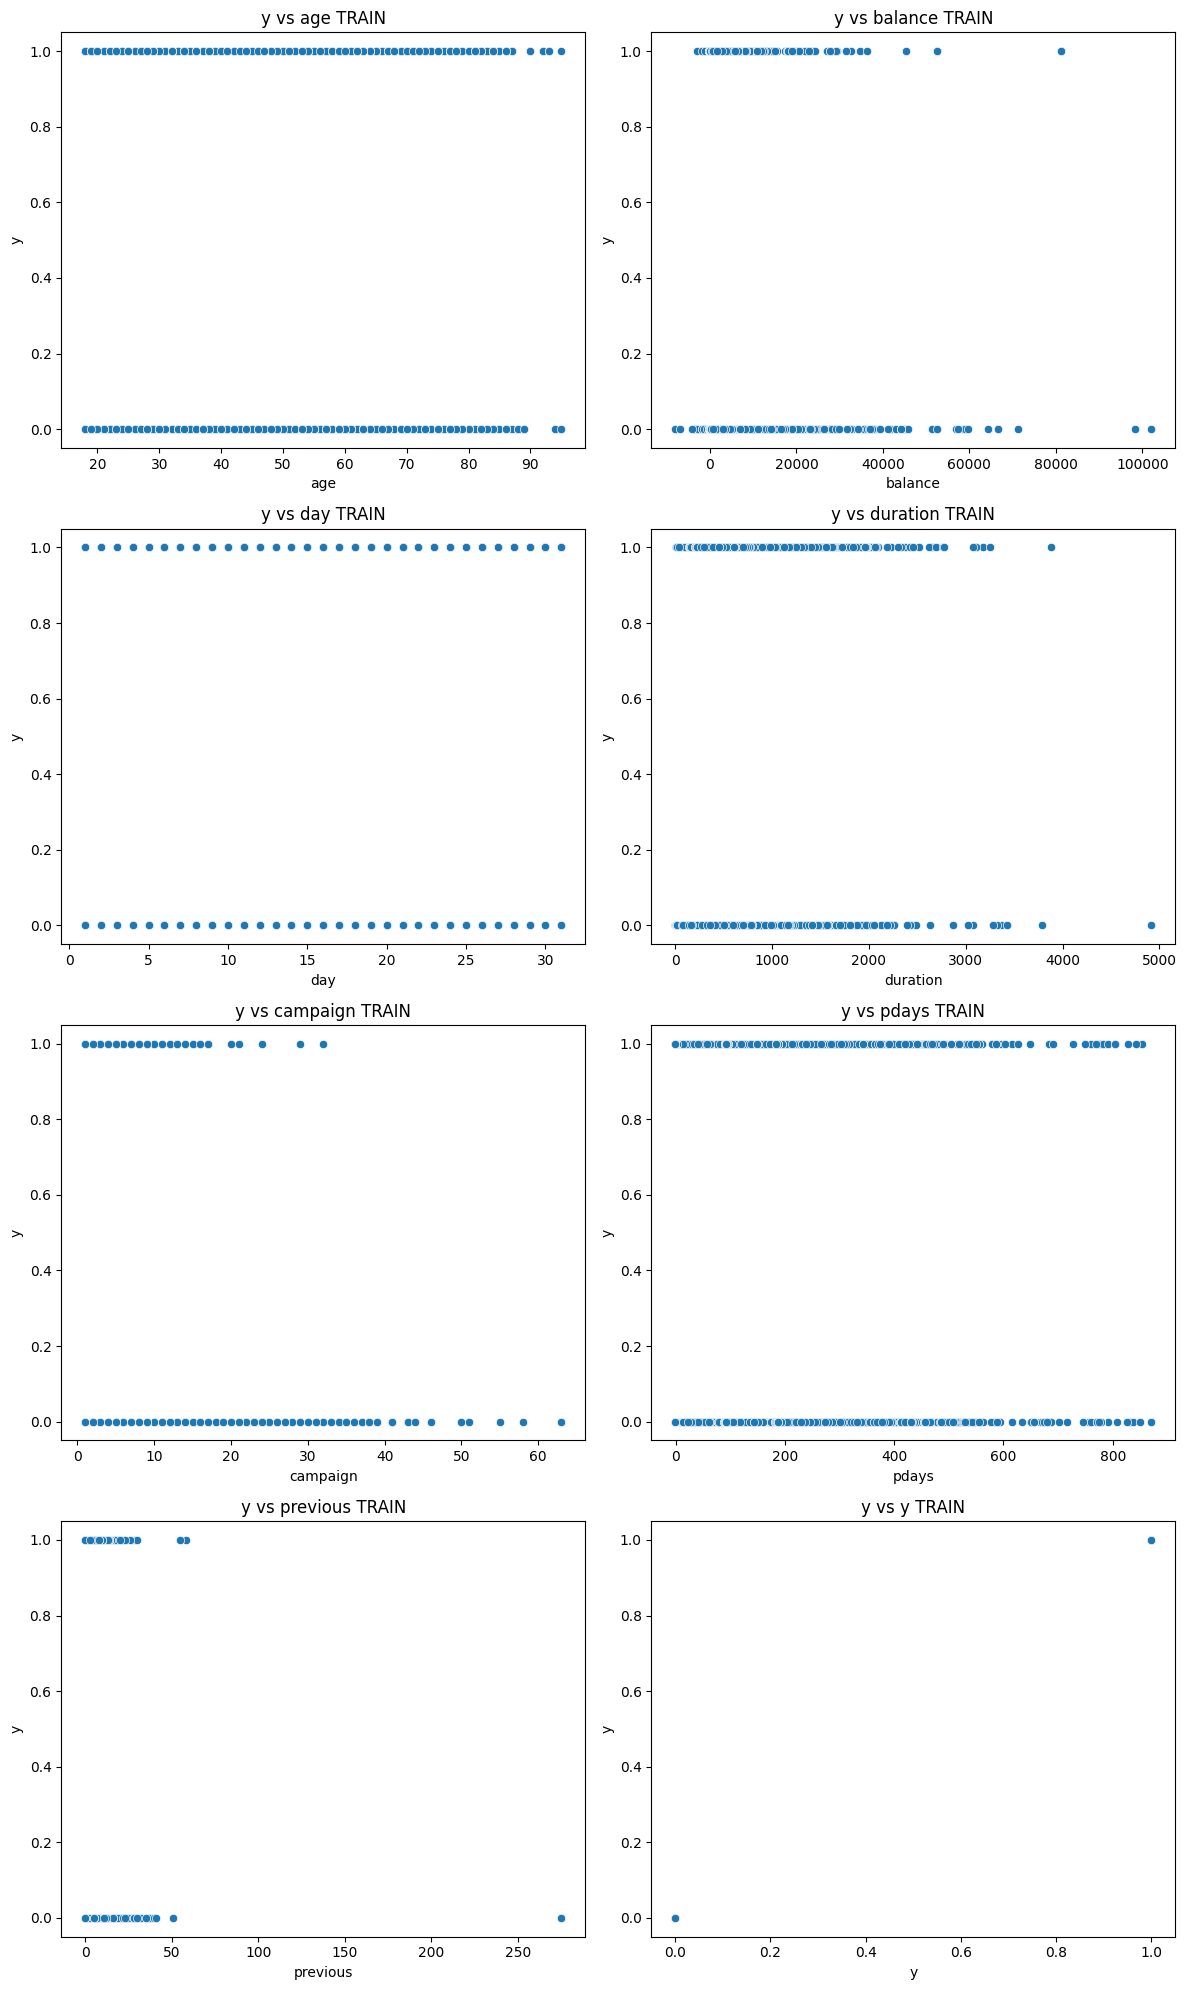

In [ ]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))
for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.scatterplot(x=df_train[feature], y=df_train['y'])
    plt.title(f'y vs {feature} TRAIN')
    plt.xlabel(feature)
    plt.ylabel('y')

plt.tight_layout()
plt.show()

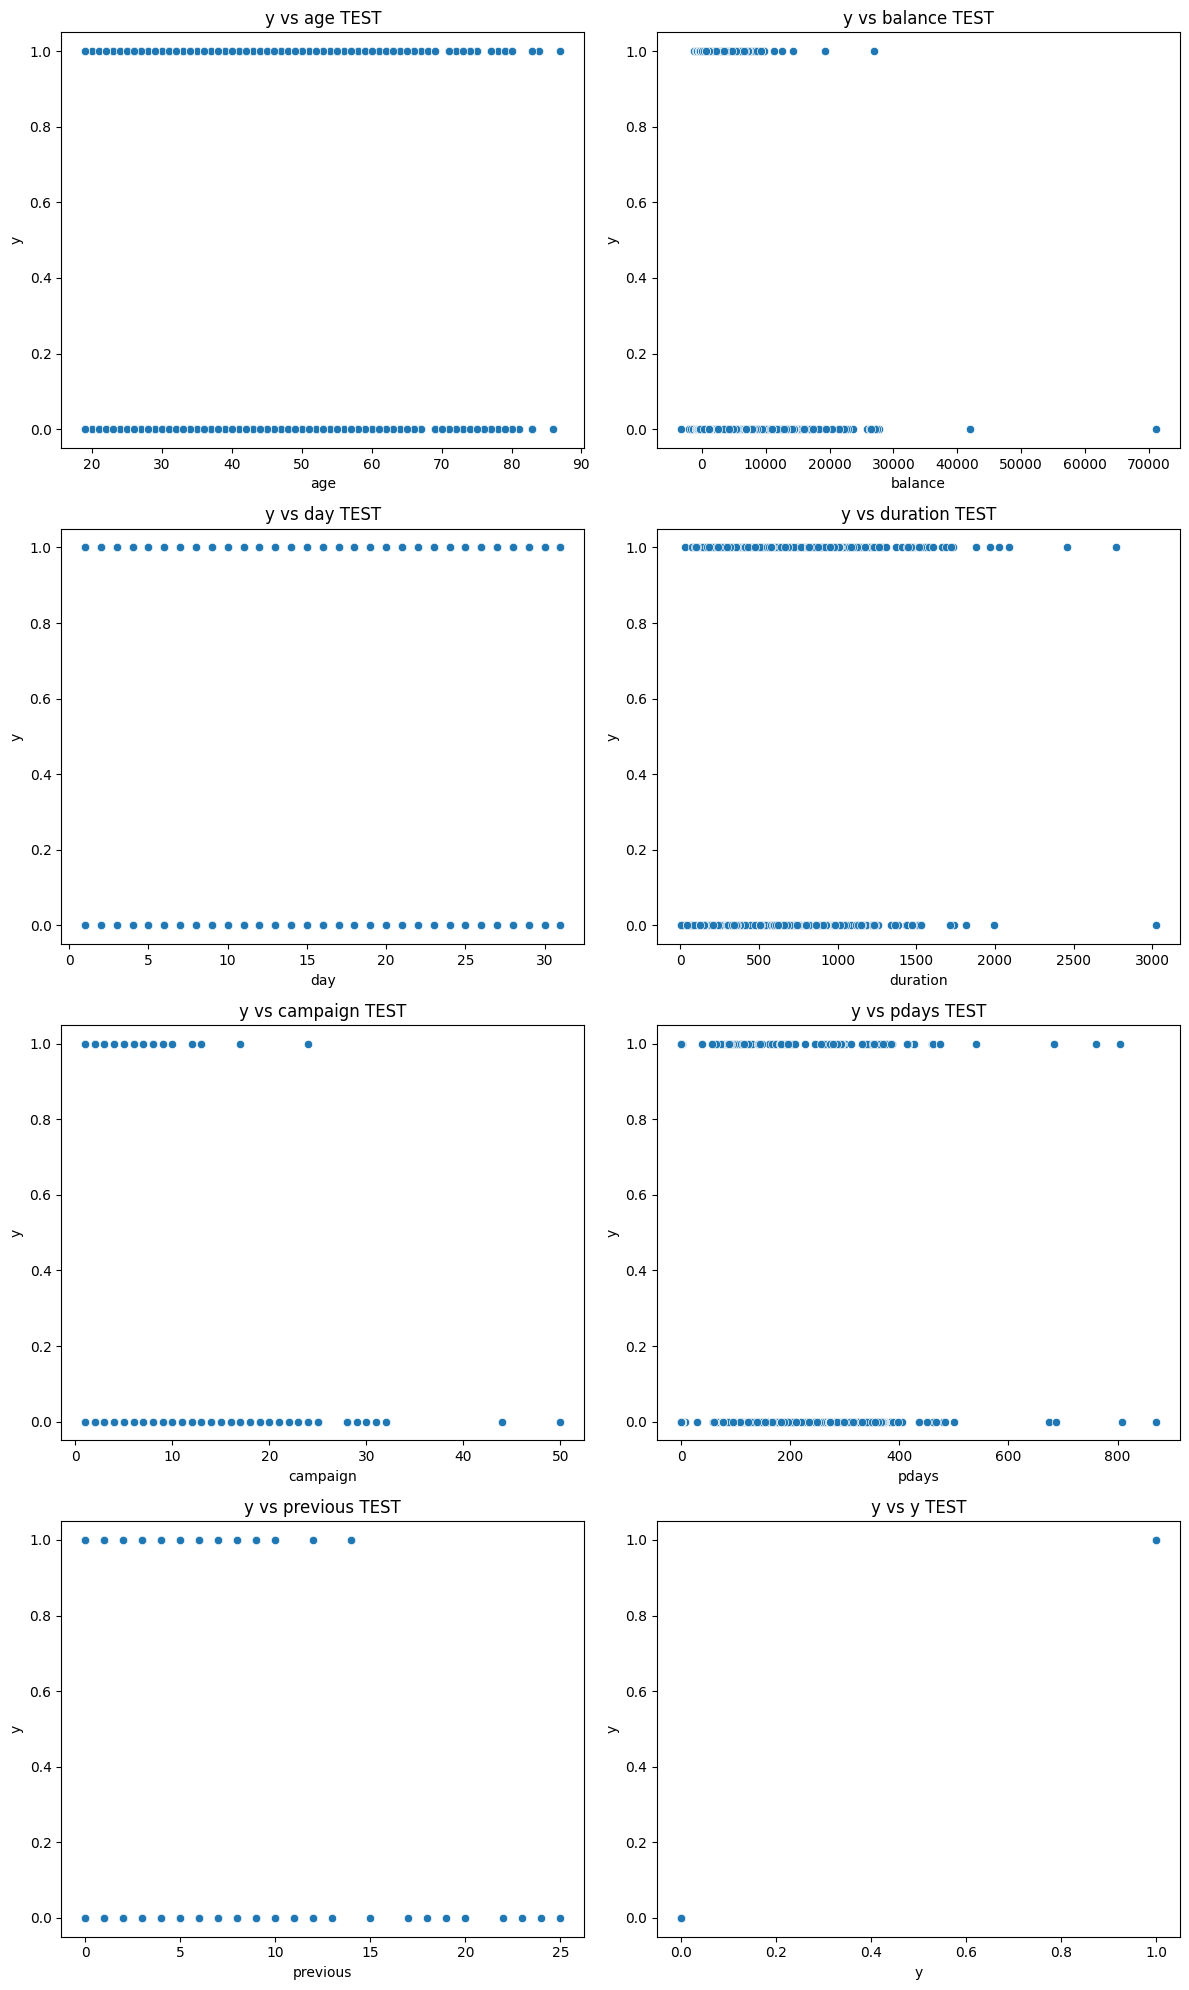

In [ ]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))
for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.scatterplot(x=df_test[feature], y=df_test['y'])
    plt.title(f'y vs {feature} TEST')
    plt.xlabel(feature)
    plt.ylabel('y')

plt.tight_layout()
plt.show()

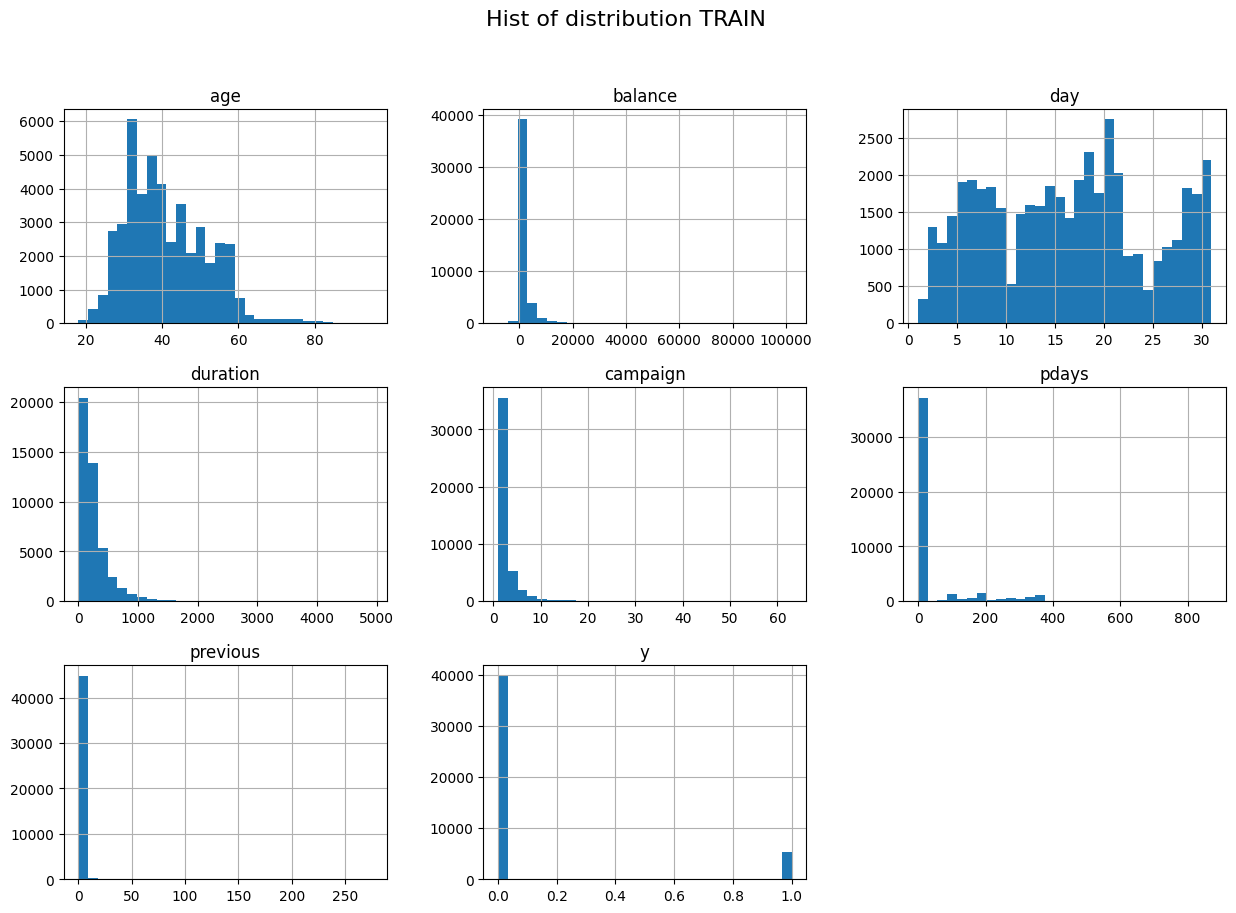

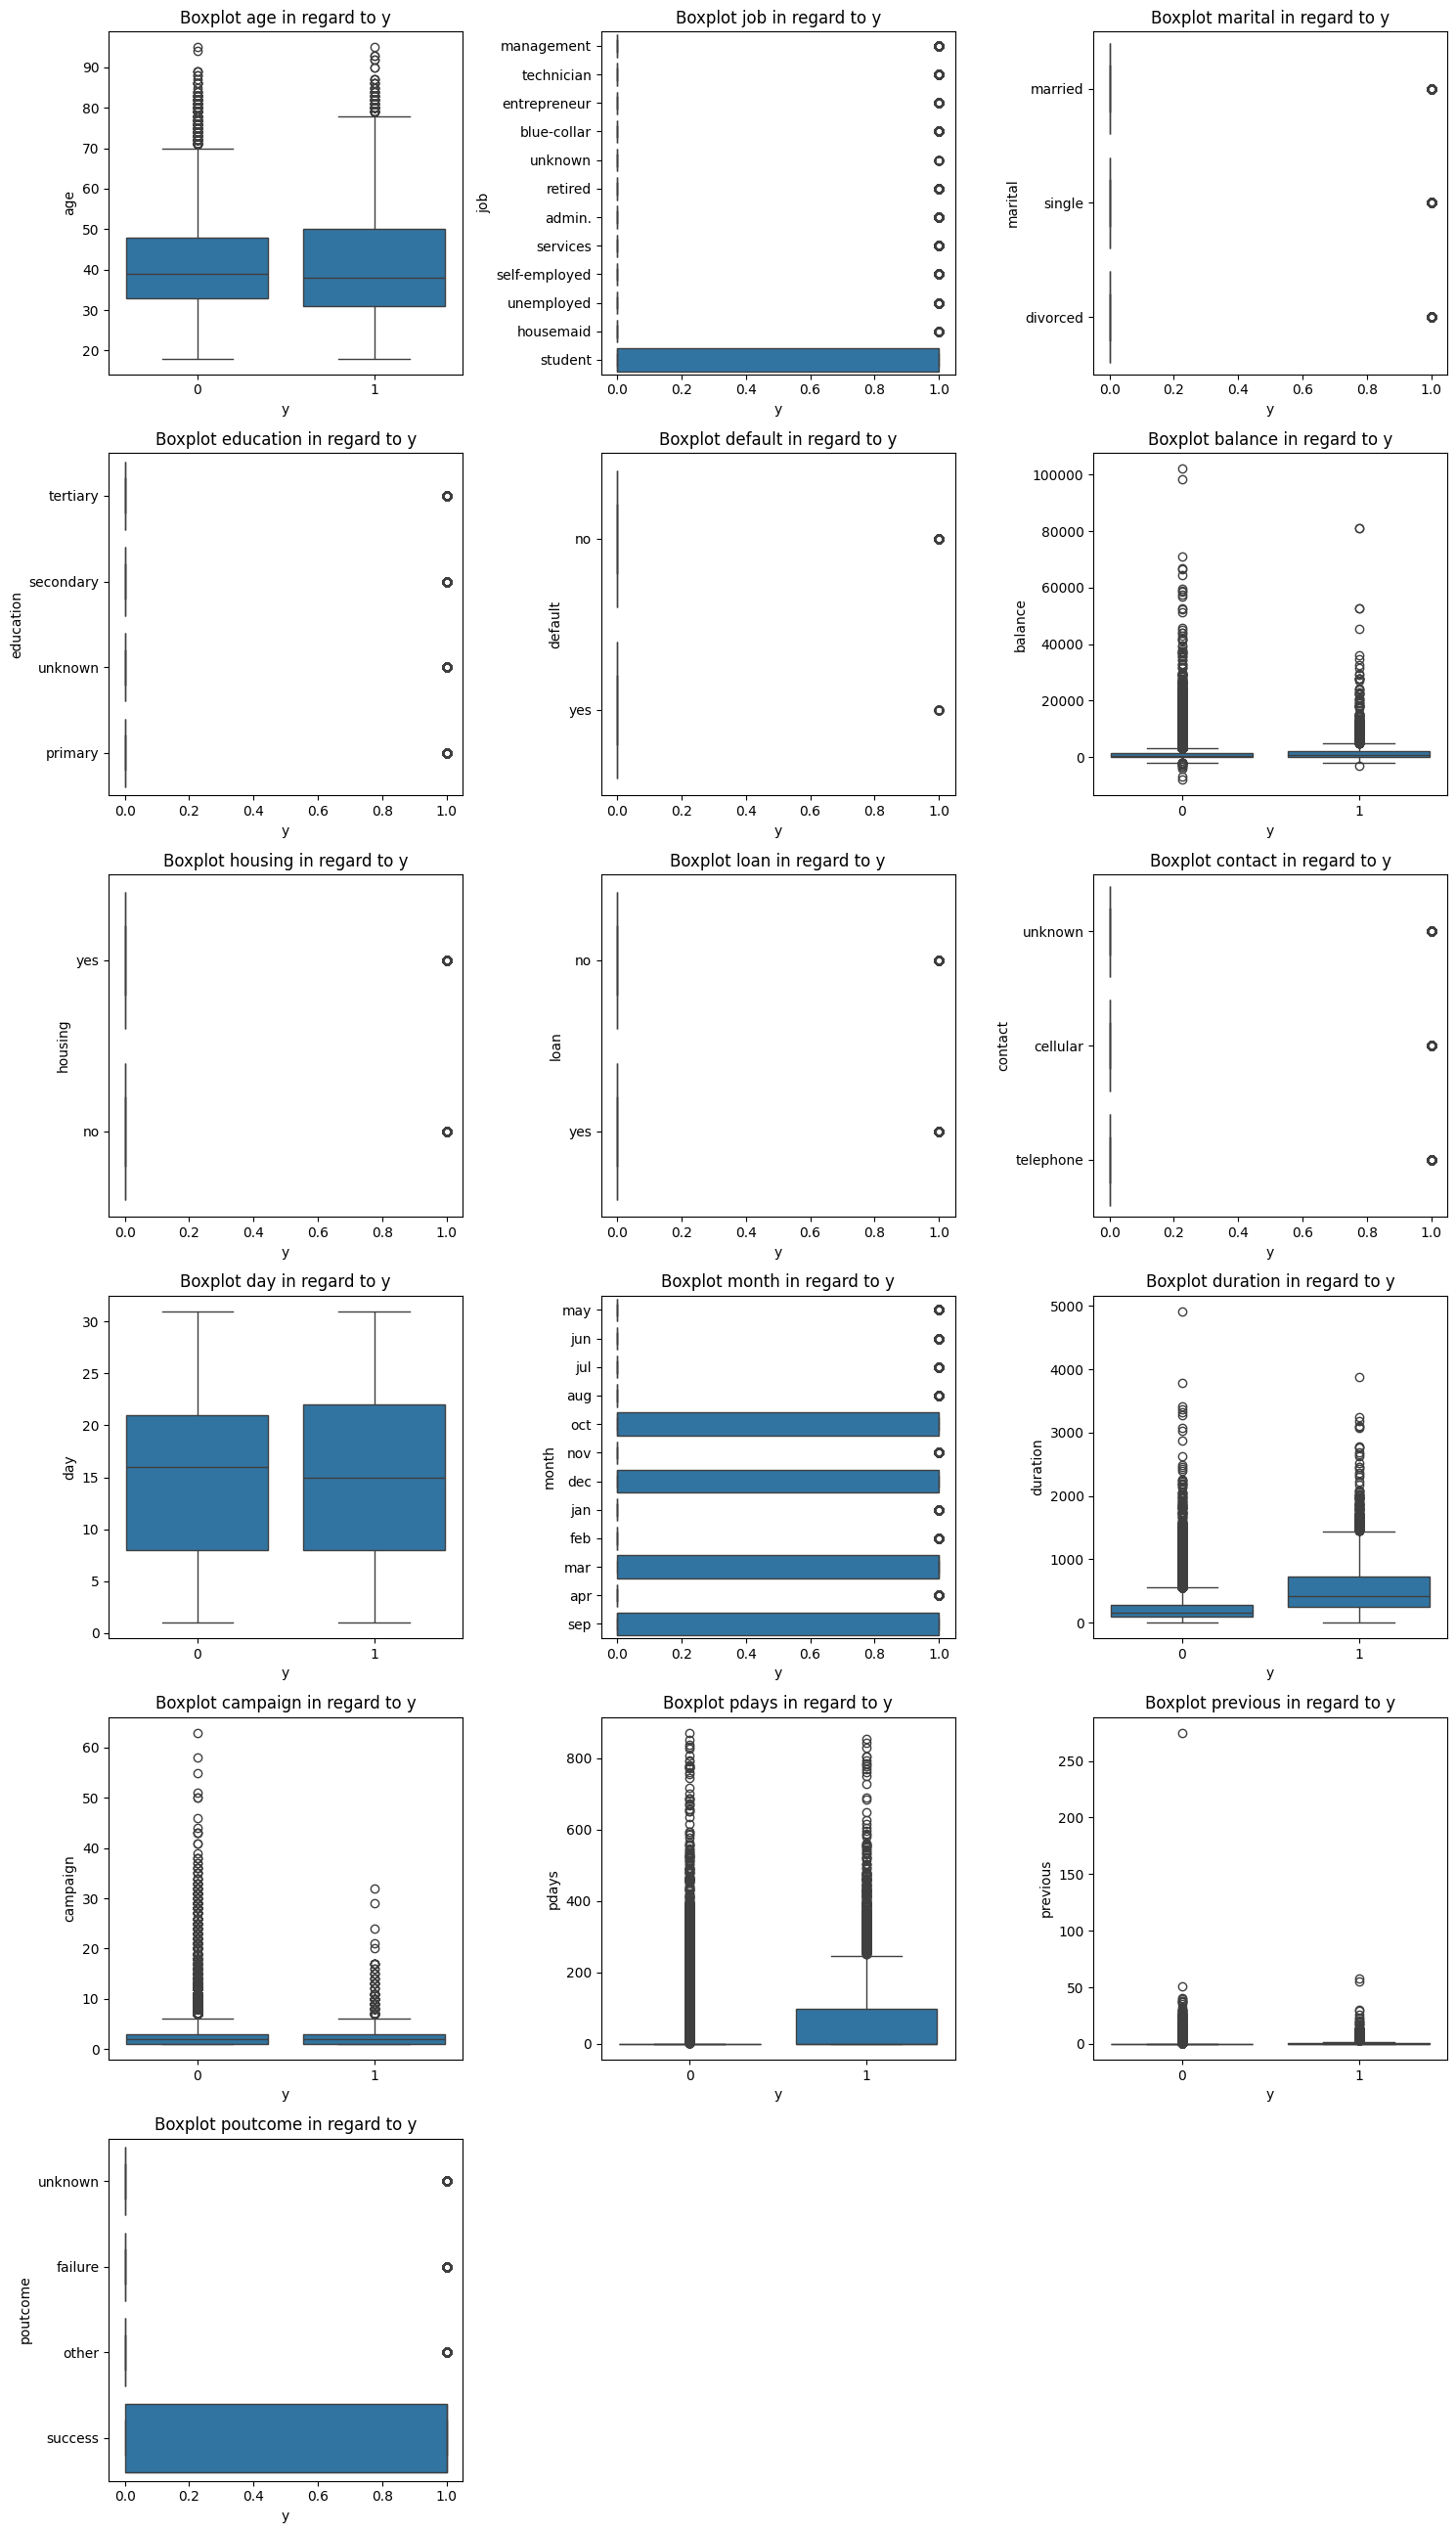

In [ ]:
df_train.hist(bins=30, figsize=(15, 10))
plt.suptitle("Hist of distribution TRAIN", fontsize=16)
plt.show()

features = df_train.drop(columns=['y']).columns

plt.figure(figsize=(15, 5 * len(features) // 3))
for i, col in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    sns.boxplot(x="y", y=col, data=df_train)
    plt.title(f"Boxplot {col} in regard to y")

plt.tight_layout()
plt.show()

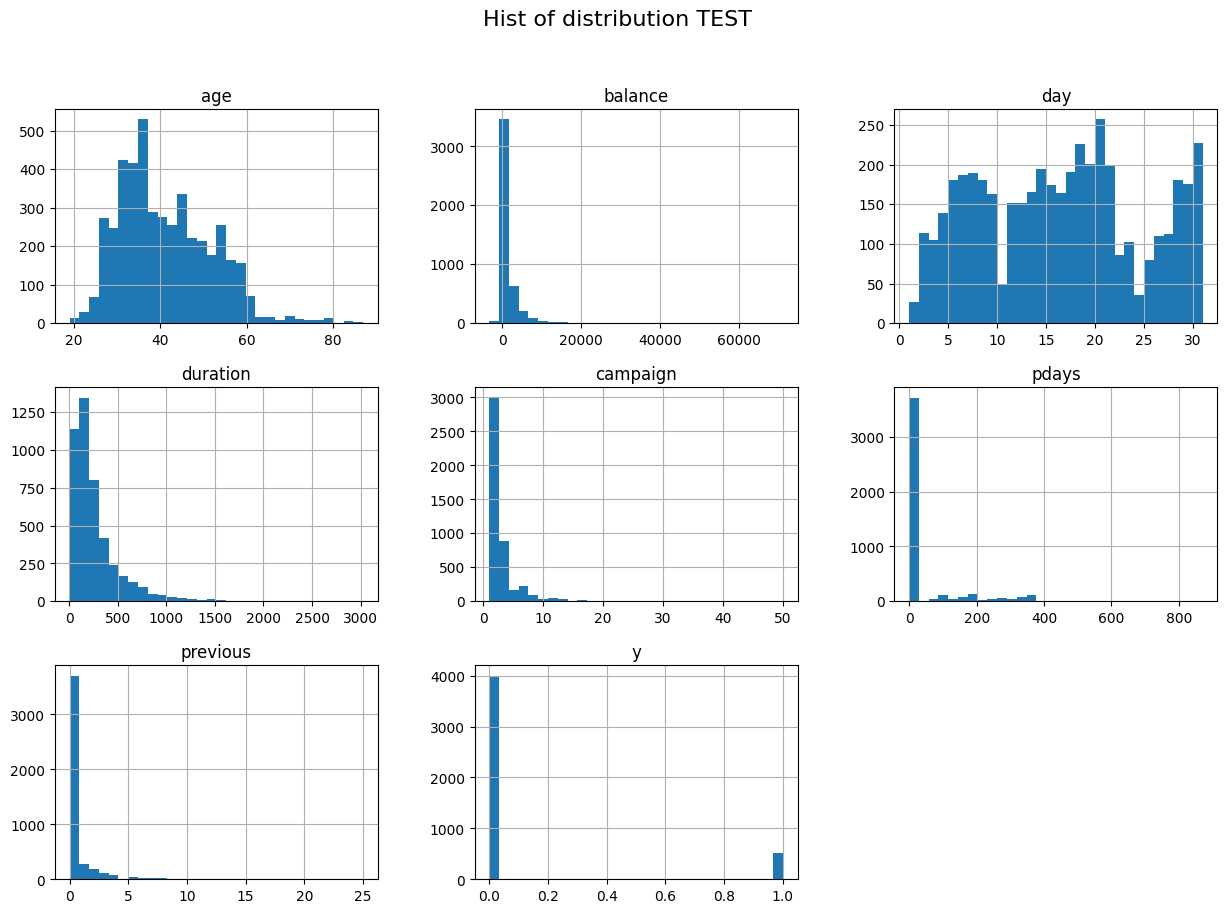

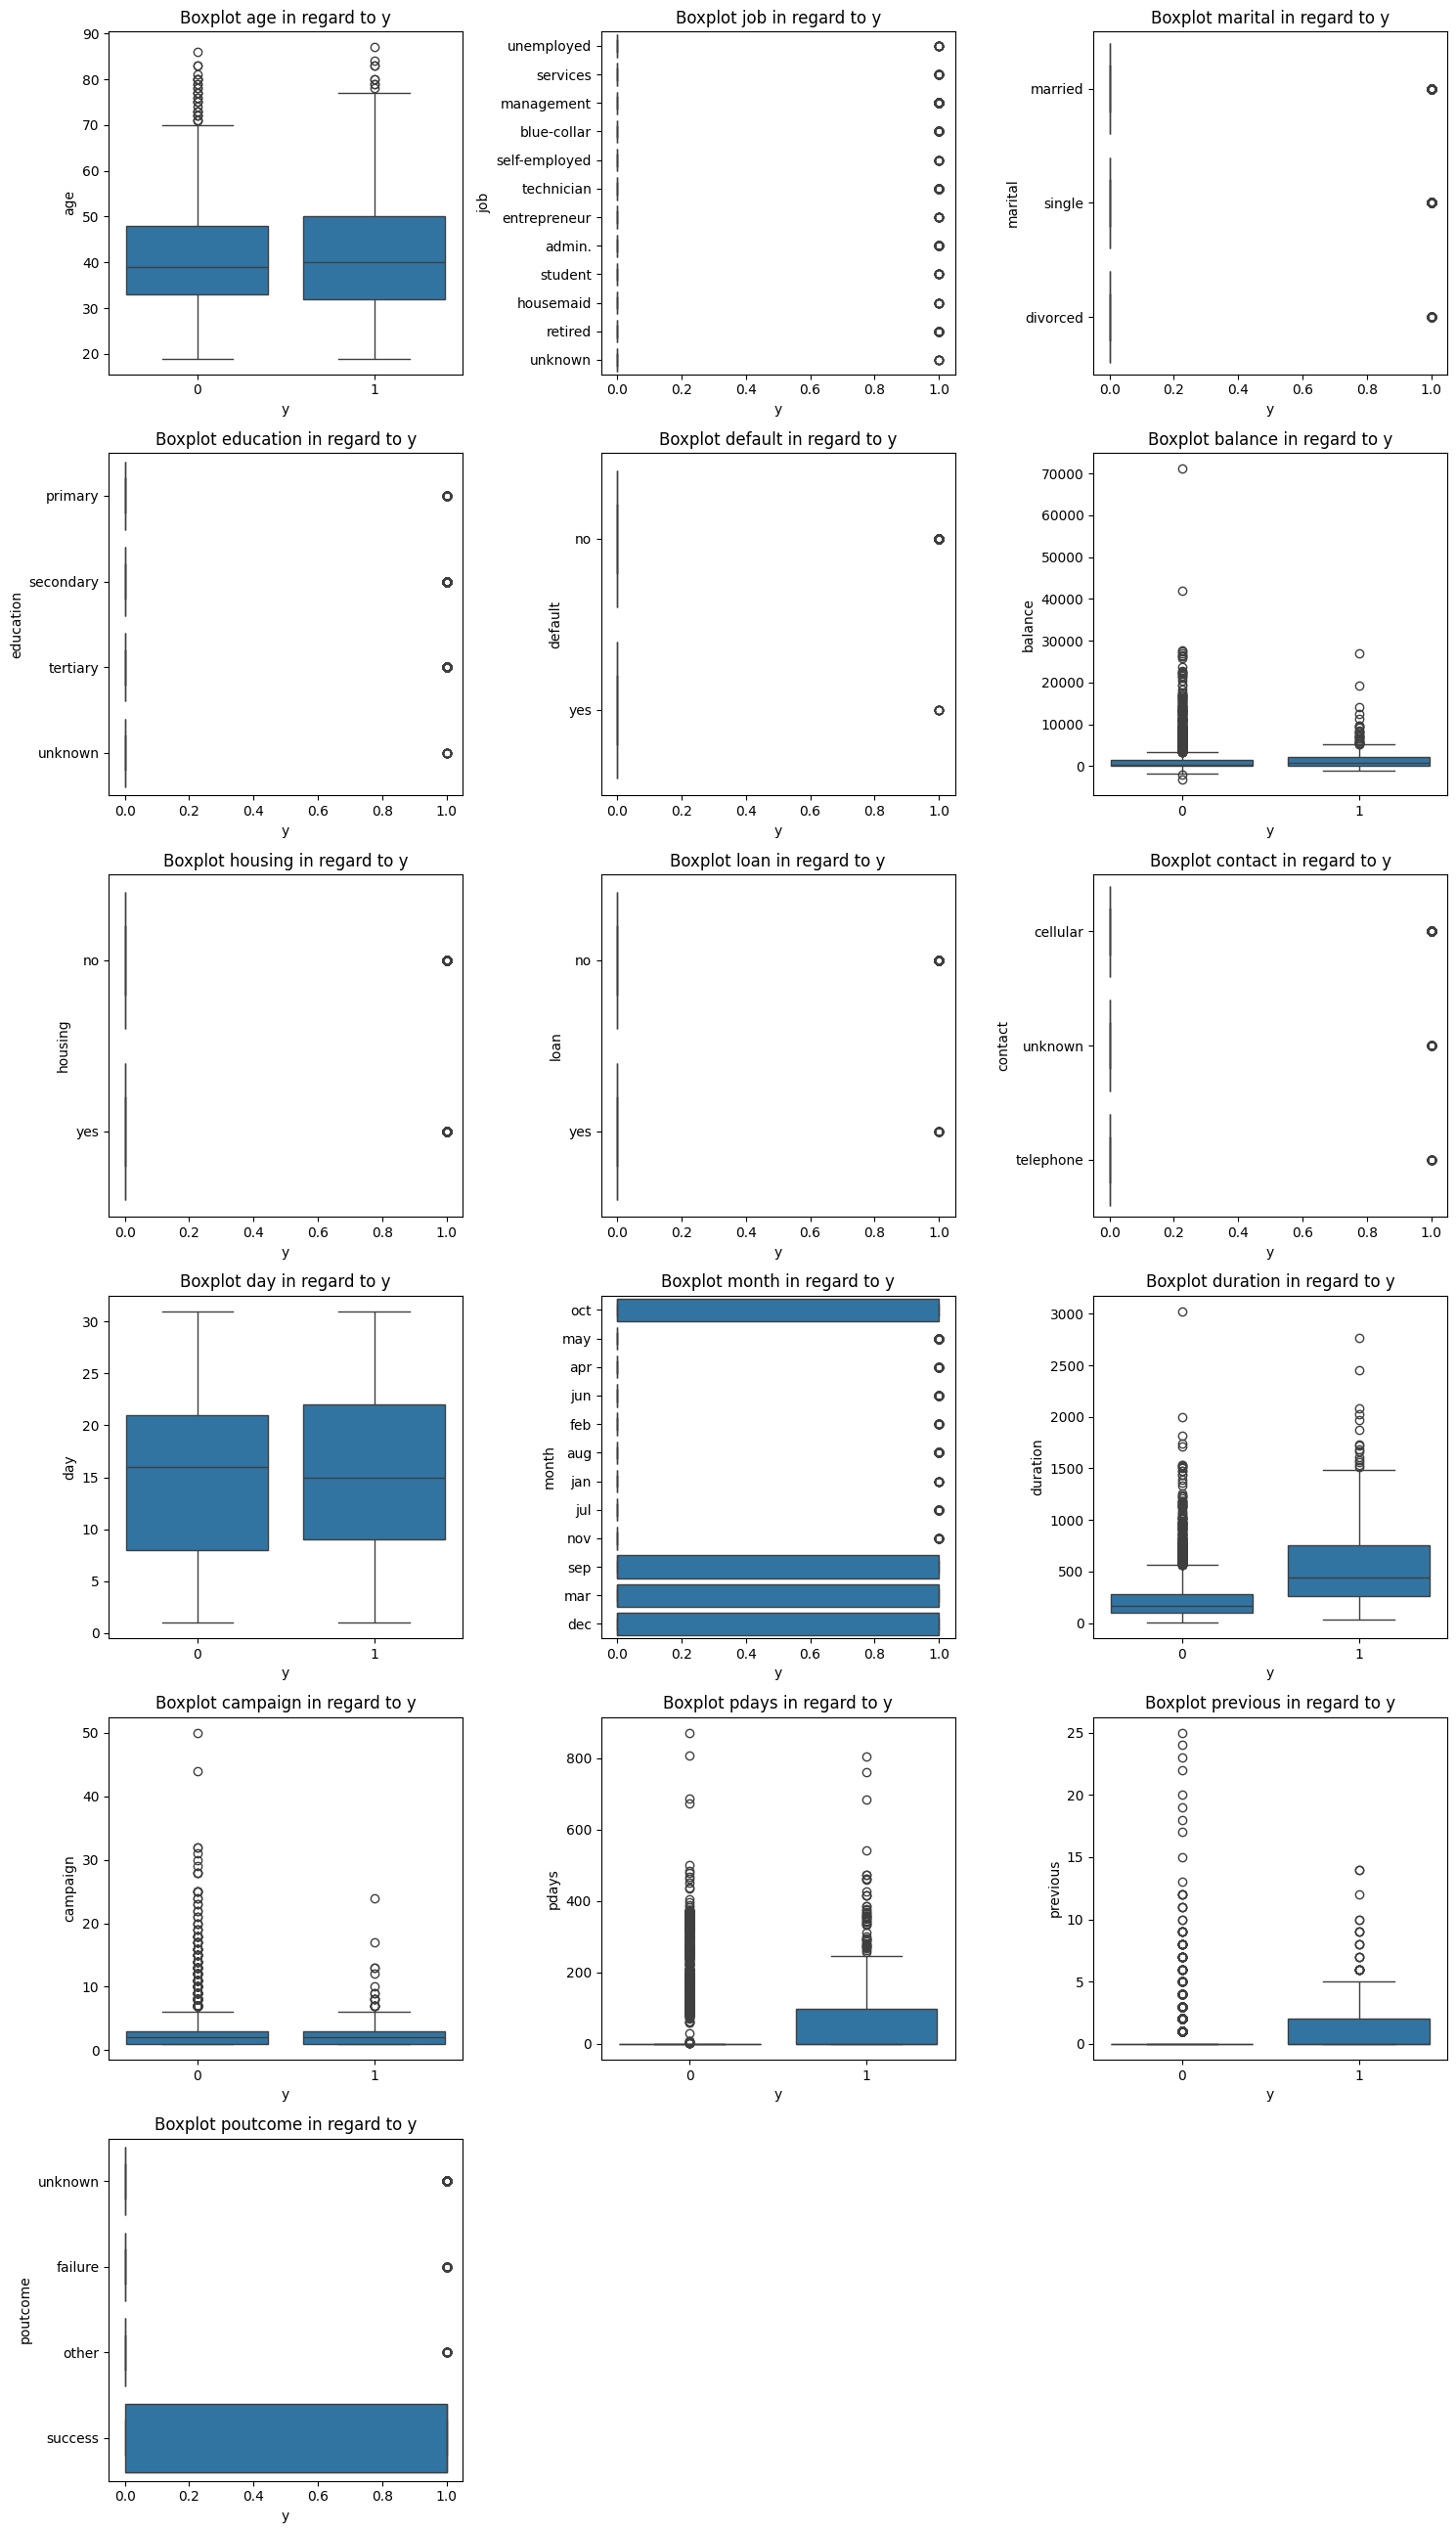

In [ ]:
df_test.hist(bins=30, figsize=(15, 10))
plt.suptitle("Hist of distribution TEST", fontsize=16)
plt.show()

features = df_test.drop(columns=['y']).columns

plt.figure(figsize=(15, 5 * len(features) // 3))
for i, col in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    sns.boxplot(x="y", y=col, data=df_test)
    plt.title(f"Boxplot {col} in regard to y")

plt.tight_layout()
plt.show()

#4. Detecting Outliers, NaN

In [11]:
df_train.shape

(45211, 17)

In [12]:
df_test.shape

(4521, 17)

Now lets examine outliers

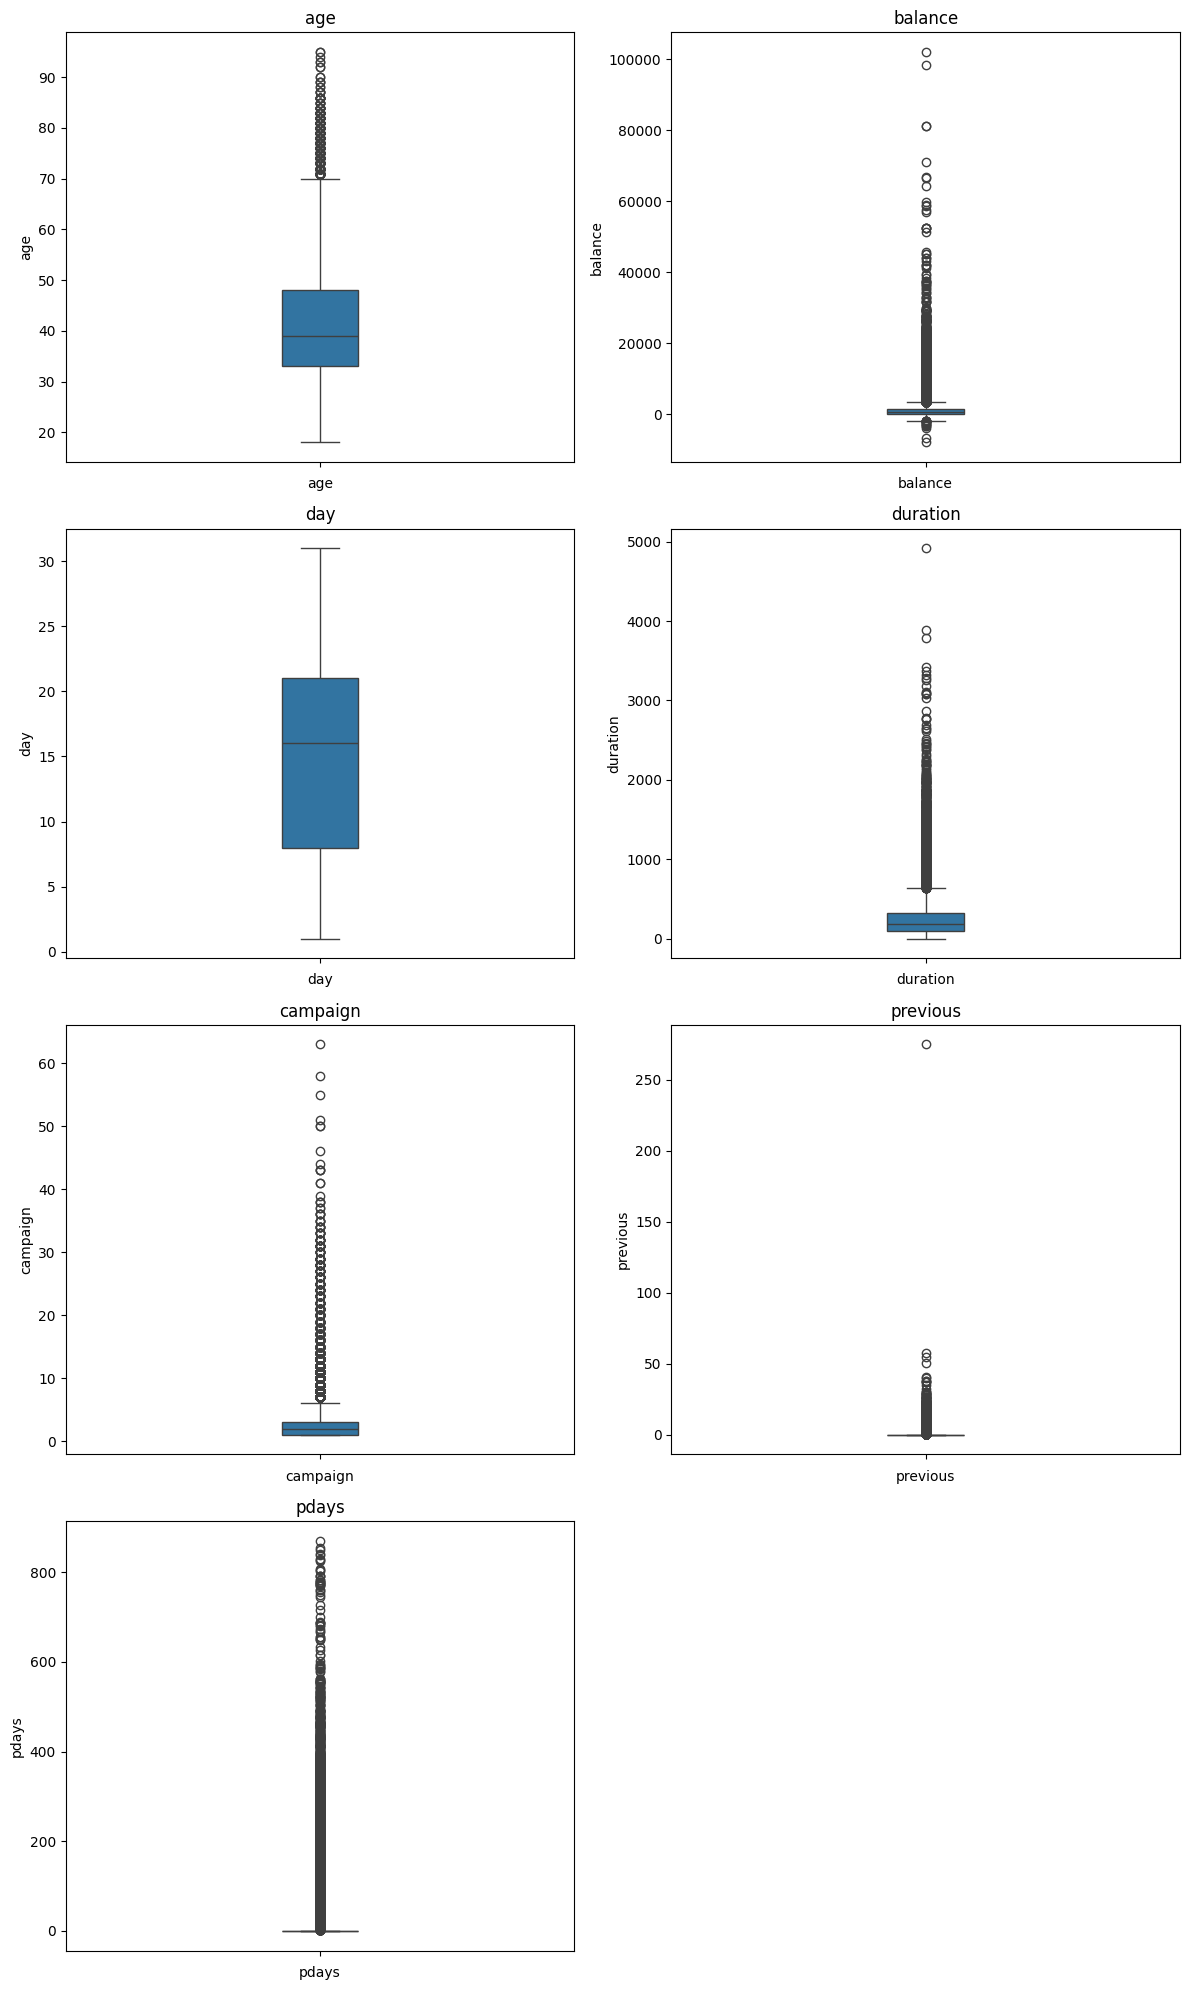

In [ ]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'pdays']
num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(y=df_train[feature], width=0.15)
    plt.title(f'{feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


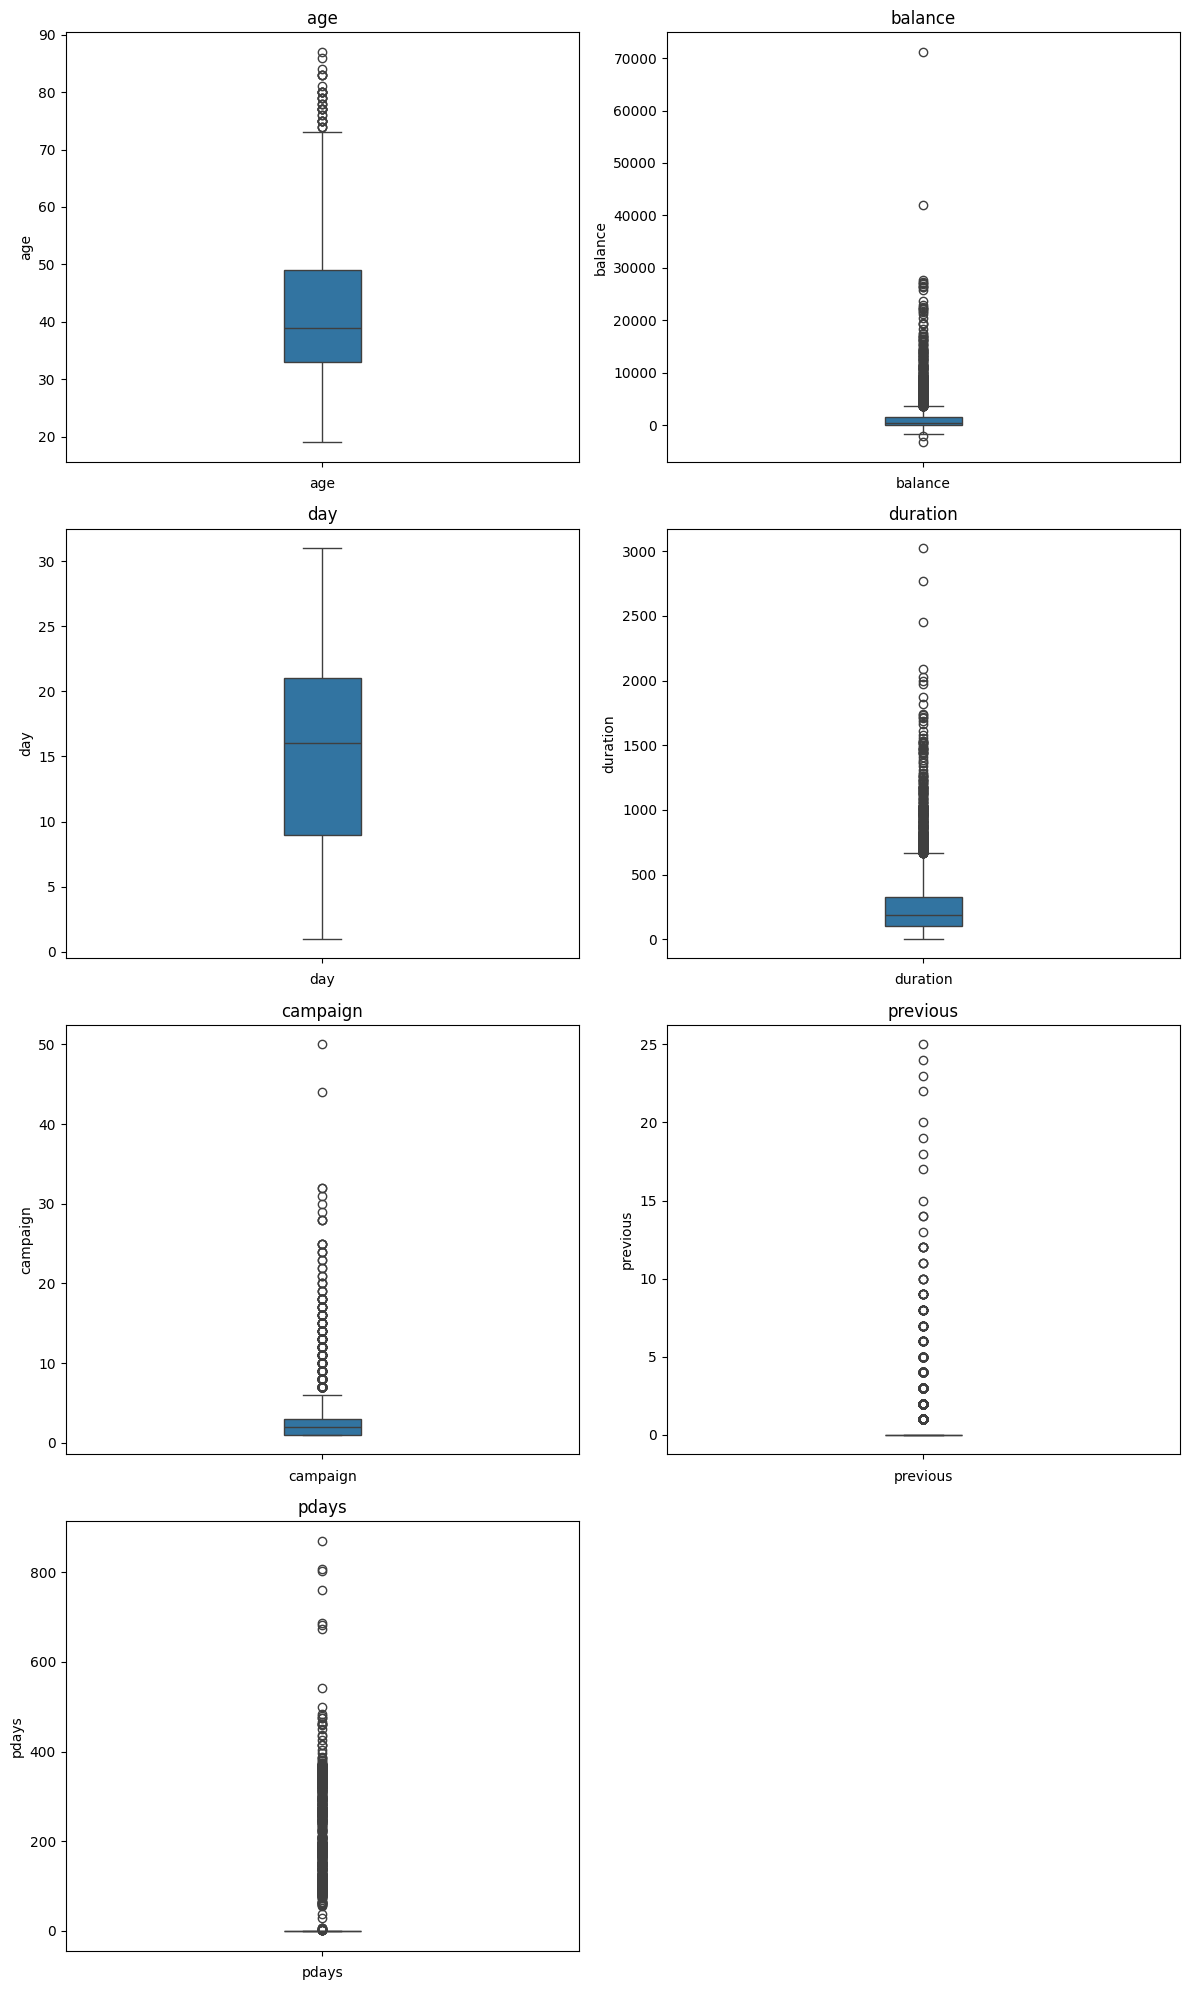

In [ ]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'pdays']
num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(y=df_test[feature], width=0.15)
    plt.title(f'{feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


All data is important:

- number of elderly people cannot be dropped;
- balance may vary, some hold much, others a little

Now lets examine NaN

1. Count how many -1 in pdays

In [13]:
(df_train['pdays'] == -1).sum(), (df_test['pdays'] == -1).sum()

(np.int64(36954), np.int64(3705))

2. Count 'unknown' in different columns

In [14]:
for col in df_train.columns:
    if 'unknown' in df_train[col].unique():
        count_unknown = (df_train[col] == 'unknown').sum()
        print(f"{col}: {count_unknown}")

job: 288
education: 1857
contact: 13020
poutcome: 36959


-1 or unknown take great part in dataset. Due to its nature, thats totally fine in terms of client information. We wont drop these


In [15]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
df_train.shape, df_test.shape

((45211, 17), (4521, 17))

#5. Further preparation of data: LabelEncoding

In [ ]:
# ENCODE ALL OBJECT DATA BEFORE MOVING ON

In [ ]:
df_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

In [ ]:
df_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   19   oct        79         1     -1         0  unknown  0  
1  cellular   11   may       220         1    339         4  failure  0  
2  cellular   16   apr       185         1    330         1  failure  0  
3   unknown    3   jun       199         4     -1         0  unknown  0  
4   unknown    5   may       226         1     -1         0  unknown  0

In [18]:
to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']
label_encoder = LabelEncoder()
for column in to_encode:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.transform(df_test[column])

In [19]:
df_train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1      0         0         3  0  
1    5      8       151         1      0         0         3  0  
2    5      8        76         1      0         0         3  0  
3    5      8        92         1      0         0         3  0  
4    5      8       198         1      0         0         3  0

In [20]:
df_test.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1      0         0         3  0  
1   11      8       220         1    336         4         0  0  
2   16      0       185         1    327         1         0  0  
3    3      6       199         4      0         0         3  0  
4    5      8       226         1      0         0         3  0

#6. Correlation between input and output

In [ ]:
'''Extract numerical variables first.'''
num_merged = df_train.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_merged.head(3))
bold('**Name of numerical variables:**')
display(num_merged.columns.values)

**Numerical variables:**

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1      0         0         3  0  
1    5      8       151         1      0         0         3  0  
2    5      8        76         1      0         0         3  0

**Name of numerical variables:**

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [ ]:
corr_matrix = num_merged.corr()

corr_matrix['y'].sort_values(ascending=False)

y            1.000000
duration     0.394521
pdays        0.101449
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

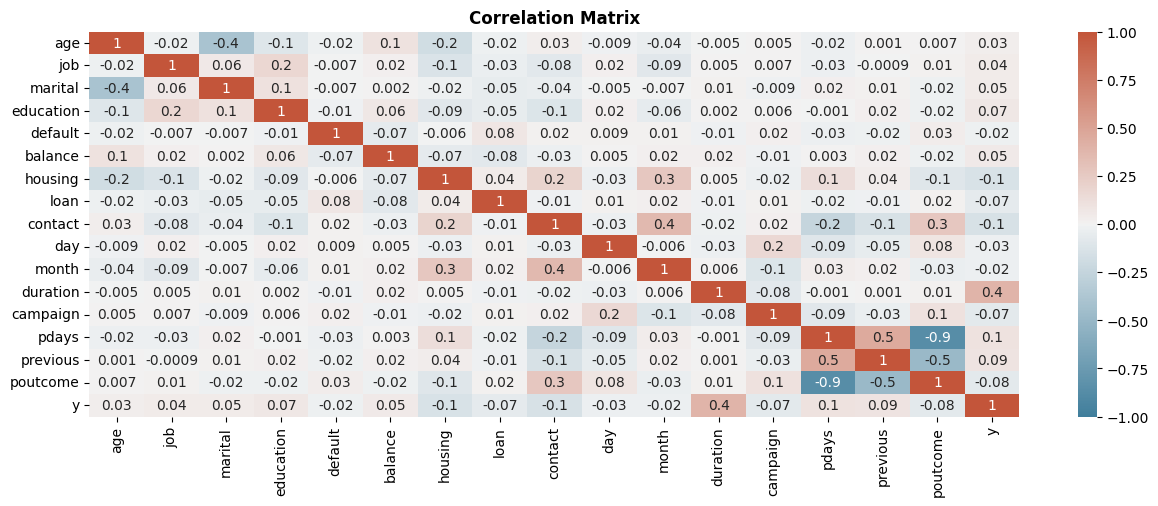

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 5))
sns.heatmap(num_merged.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [ ]:
corr_matrix = num_merged.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)

negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 Series([], dtype: float64)

Less Correlated Pairs: 
 pdays     poutcome   -0.864747
poutcome  pdays      -0.864747
dtype: float64


In [ ]:
df_corr = num_merged.corr()
bold('**Correlated Variables:**')
display(df_corr['y'].sort_values(ascending = False))

**Correlated Variables:**

y            1.000000
duration     0.394521
pdays        0.101449
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

In [ ]:
# NOW FOR TEST

In [ ]:
'''Extract numerical variables first.'''
num_merged = df_test.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_merged.head(3))
bold('**Name of numerical variables:**')
display(num_merged.columns.values)

**Numerical variables:**

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1      0         0         3  0  
1   11      8       220         1    336         4         0  0  
2   16      0       185         1    327         1         0  0

**Name of numerical variables:**

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [ ]:
corr_matrix = num_merged.corr()

corr_matrix['y'].sort_values(ascending=False)

y            1.000000
duration     0.401118
previous     0.116714
pdays        0.101390
age          0.045092
education    0.042987
job          0.027401
balance      0.017905
marital      0.015042
default      0.001303
day         -0.011244
month       -0.040933
campaign    -0.061147
loan        -0.070517
poutcome    -0.082632
housing     -0.104683
contact     -0.133595
Name: y, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

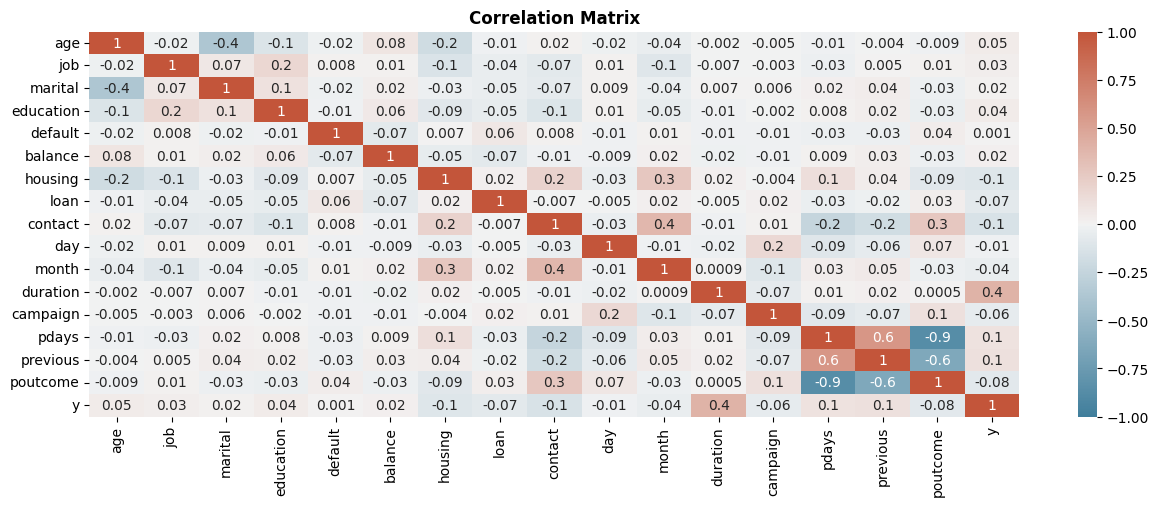

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 5))
sns.heatmap(num_merged.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [ ]:
corr_matrix = num_merged.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)

negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 pdays     previous    0.581382
previous  pdays       0.581382
dtype: float64

Less Correlated Pairs: 
 pdays     poutcome   -0.867612
previous  poutcome   -0.636372
poutcome  pdays      -0.867612
          previous   -0.636372
dtype: float64


In [ ]:
df_corr = num_merged.corr()
bold('**Correlated Variables:**')
display(df_corr['y'].sort_values(ascending = False))

**Correlated Variables:**

y            1.000000
duration     0.401118
previous     0.116714
pdays        0.101390
age          0.045092
education    0.042987
job          0.027401
balance      0.017905
marital      0.015042
default      0.001303
day         -0.011244
month       -0.040933
campaign    -0.061147
loan        -0.070517
poutcome    -0.082632
housing     -0.104683
contact     -0.133595
Name: y, dtype: float64

#7. Splitting data into TRAIN (90%) and TEST (10%) (they are already split)

In [22]:
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])
y_test = df_test['y']

In [131]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

#8. PCA scaling


In [111]:
pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

print("Dimension X_train BEFORE PCA:", X_train.shape)
print("Dimension X_train AFTER PCA:", X_train_pca.shape)
print("\nDimension X_test BEFORE PCA:", X_test.shape)
print("Dimension X_test AFTER PCA:", X_test_pca.shape)

print("\nAmount of components:", pca.n_components_)
print("Summed explained variance:", round(sum(pca.explained_variance_ratio_), 4))

Dimension X_train BEFORE PCA: (45211, 16)
Dimension X_train AFTER PCA: (45211, 14)

Dimension X_test BEFORE PCA: (4521, 16)
Dimension X_test AFTER PCA: (4521, 14)

Amount of components: 14
Summed explained variance: 0.9593


# Model Training: Sklearn DecisionTree + graph - MAIN

In [115]:
# BASIC
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, class_weight='balanced')

start_time = time.time()#################
decision_tree.fit(X_train, y_train)
train_time_orig = time.time() - start_time##################

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f'Accuracy of Decision  BASIC: {accuracy_dt:.8f}')
print(f'Time of Decision Tree BASIC: {train_time_orig:.8f} sec')

Accuracy of Decision  BASIC: 0.96416722
Time of Decision Tree BASIC: 0.34061956 sec


In [116]:
# PCA
decision_tree_pca = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, class_weight='balanced')

start_time = time.time()####################
decision_tree_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start_time################

y_pred_dt_pca = decision_tree_pca.predict(X_test_pca)
acc_pca_dt = accuracy_score(y_test, y_pred_dt_pca)

print(f'Accuracy of Decision PCA: {acc_pca_dt:.8f}')
print(f'Time of Decision Tree PCA: {train_time_pca:.8f} sec')


Accuracy of Decision PCA: 0.97677505
Time of Decision Tree PCA: 2.46402144 sec


In [129]:
####### >Precision, >Time

In [95]:
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4000
           1       0.77      0.99      0.86       521

    accuracy                           0.96      4521
   macro avg       0.88      0.98      0.92      4521
weighted avg       0.97      0.96      0.97      4521



In [96]:
report = classification_report(y_test, y_pred_dt_pca)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4000
           1       0.83      1.00      0.91       521

    accuracy                           0.98      4521
   macro avg       0.92      0.99      0.95      4521
weighted avg       0.98      0.98      0.98      4521



In [97]:
cf_matrix = confusion_matrix(y_test, y_pred_dt_pca)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[3896  104]
 [   1  520]]
True Positives (TP): 520
False Positives (FP): 104
True Negatives (TN): 3896
False Negatives (FN): 1


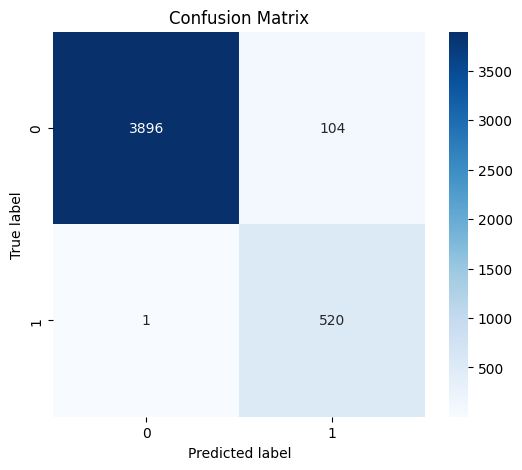

In [98]:
cm = confusion_matrix(y_test, y_pred_dt_pca)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


# Model Training: Sklearn RandomForest - MAIN

In [100]:
random_forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, max_depth=20, min_samples_split=2, criterion='entropy', max_features=None, random_state=42, class_weight='balanced')

start_time = time.time()
random_forest.fit(X_train, y_train)
train_time_pca = time.time() - start_time

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy of Random Forest BASIC: {accuracy_rf:.8f}')
print(f'Time of Random Forest BASIC: {train_time_pca:.8f}')

Accuracy of Random Forest BASIC: 0.99491263
Time of Random Forest BASIC: 24.65018296


In [101]:
random_forest_pca = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, max_depth=20, min_samples_split=2, criterion='entropy', max_features=None, random_state=42, class_weight='balanced')

start_time = time.time()####################
random_forest_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start_time################

y_pred_rf_pca = random_forest_pca.predict(X_test_pca)
acc_pca_dt = accuracy_score(y_test, y_pred_rf_pca)

print(f'Accuracy of Random Forest PCA: {acc_pca_dt:.8f}')
print(f'Time of Random Forest PCA: {train_time_pca:.8f} sec')

Accuracy of Random Forest PCA: 0.99668215
Time of Random Forest PCA: 86.37177587 sec


In [ ]:
####### >Precision, >>Time

In [121]:
report = classification_report(y_test, y_pred_rf_pca)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.98      1.00      0.99       521

    accuracy                           1.00      4521
   macro avg       0.99      1.00      0.99      4521
weighted avg       1.00      1.00      1.00      4521



In [122]:
cf_matrix = confusion_matrix(y_test, y_pred_rf_pca)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[3987   13]
 [   2  519]]
True Positives (TP): 519
False Positives (FP): 13
True Negatives (TN): 3987
False Negatives (FN): 2


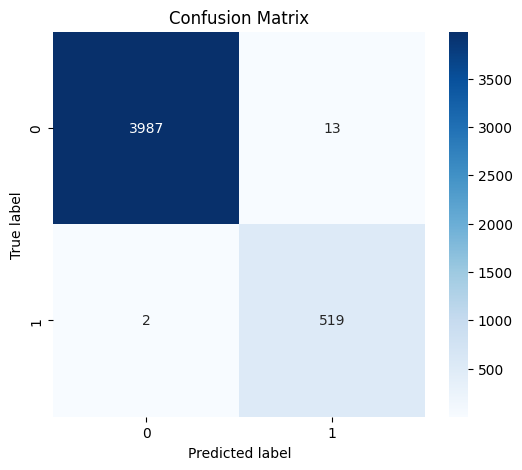

In [123]:
cm = confusion_matrix(y_test, y_pred_rf_pca)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


# Model training: Sklearn KNN - MAIN

In [117]:
#BASIC
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=1)

start_time = time.time()
knn.fit(X_train, y_train)
train_time_orig = time.time() - start_time

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy of kNN BASIC: {accuracy_knn:.8f}')
print(f'Time of kNN BASIC: {train_time_orig:.8f}')

Accuracy of kNN BASIC: 1.00000000
Time of kNN BASIC: 0.00881600


In [118]:
#PCA
knn_pca = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=1)

start_time = time.time()
knn_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start_time

y_pred_knn_pca = knn_pca.predict(X_test_pca)
acc_pca_knn = accuracy_score(y_test, y_pred_knn_pca)

print(f'Accuracy of kNN PCA: {acc_pca_knn:.8f}')
print(f'Time of kNN PCA: {train_time_pca:.8f}')

Accuracy of kNN PCA: 1.00000000
Time of kNN PCA: 0.10436416


In [ ]:
####### =Precision, >Time

In [119]:
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [120]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[4000    0]
 [   0  521]]
True Positives (TP): 521
False Positives (FP): 0
True Negatives (TN): 4000
False Negatives (FN): 0


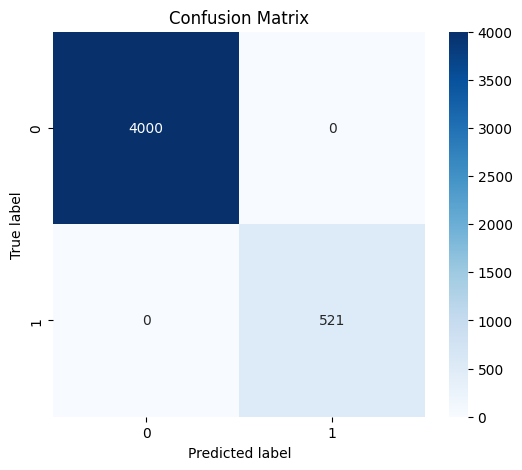

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


# Model Training: Sklearn SVM - MAIN

In [124]:
#BASIC
svm_model = SVC(kernel='rbf')

start_time = time.time()
svm_model.fit(X_train, y_train)
train_time_orig = time.time() - start_time

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy of SVM BASIC: {accuracy_svm:.8f}')
print(f'Time of SVM BASIC: {train_time_orig:.8f}')

Accuracy of SVM BASIC: 0.90754258
Time of SVM BASIC: 60.56836438


In [125]:
#PCA
svm_pca = SVC(kernel='rbf')

start_time = time.time()
svm_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start_time

y_pred_svm_pca = svm_pca.predict(X_test_pca)
acc_pca_svm = accuracy_score(y_test, y_pred_svm_pca)

print(f'Accuracy of SVM PCA: {acc_pca_svm:.8f}')
print(f'Time of SVM PCA: {train_time_pca:.8f}')

Accuracy of SVM PCA: 0.90400354
Time of SVM PCA: 43.49558663


In [ ]:
####### <Precision, <Time

In [126]:
report = classification_report(y_test, y_pred_svm_pca)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.71      0.28      0.40       521

    accuracy                           0.90      4521
   macro avg       0.81      0.63      0.67      4521
weighted avg       0.89      0.90      0.88      4521



In [127]:
cf_matrix = confusion_matrix(y_test, y_pred_svm_pca)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[3942   58]
 [ 376  145]]
True Positives (TP): 145
False Positives (FP): 58
True Negatives (TN): 3942
False Negatives (FN): 376


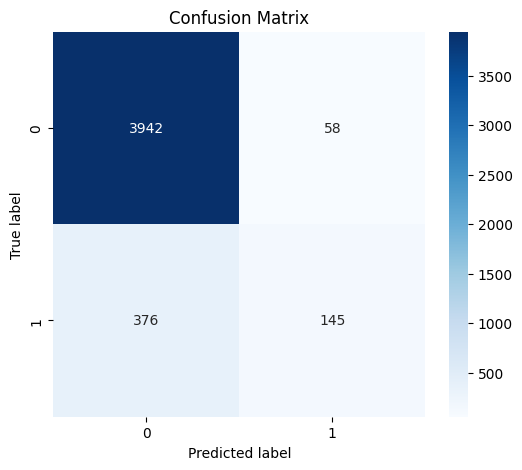

In [128]:
cm = confusion_matrix(y_test, y_pred_svm_pca)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Well, thats bad. Most models demostrated more Precision but more Runtime, which is bad. This is because of the unbalanced data, nature of dataset, etc

#9. tSNE

Original shape: (45211, 16)
After t-SNE: (45211, 2)


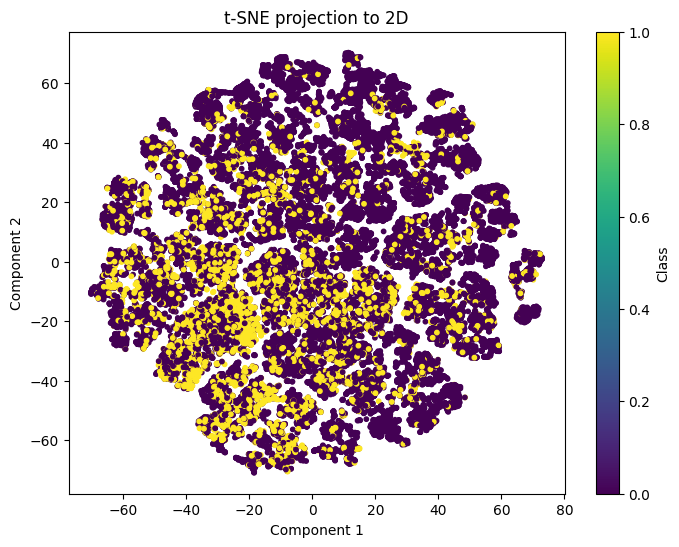

In [132]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

print("Original shape:", X_train.shape)
print("After t-SNE:", X_train_tsne.shape)

plt.figure(figsize=(8,6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=10)
plt.title("t-SNE projection to 2D")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Class')
plt.show()

In [ ]:
# tSNE ran VERYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY slow compared to previous results (12mins)

#quick start - MAIN

In [ ]:
# 1. Preparation and analysis of chosen data
''' Read in the train and test datasets separately '''
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_deposit.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_deposit.csv")

# 2. Target encoding
label_encoder = LabelEncoder()
df_train['y'] = label_encoder.fit_transform(df_train['y'])
df_test['y'] = label_encoder.transform(df_test['y'])  # важливо: трансформуємо тією ж схемою

# 3. Detecting Outliers, NaN (для train і test окремо!)
def clean_dataset(df):
    # df.loc[df.pdays == -1, 'pdays'] = np.nan
    # col = ['job', 'education', 'contact', 'poutcome']
    # for column in col:
    #     df.replace({column: {'unknown': np.nan}}, inplace=True)
    # df.drop(['pdays','poutcome'] , inplace = True, axis = 1)
    df.loc[df['job'].isna() , 'job'] = df.job.value_counts().idxmax()
    df.loc[df['education'].isna() , 'education'] = df.education.value_counts().idxmax()
    df.loc[df.contact.isnull(), 'contact'] = df.contact.value_counts().idxmax()
    return df

df_train = clean_dataset(df_train)
df_test = clean_dataset(df_test)


# 4. Further preparation of data: LabelEncoding
to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']
label_encoder = LabelEncoder()
for column in to_encode:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.transform(df_test[column])

# 5. Split into X, y
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])
y_test = df_test['y']
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45211, 16) (4521, 16) (45211,) (4521,)


#10. Cluster picture

Processing k = 64...
Processing k = 32...
Processing k = 16...
Processing k = 8...
Processing k = 4...


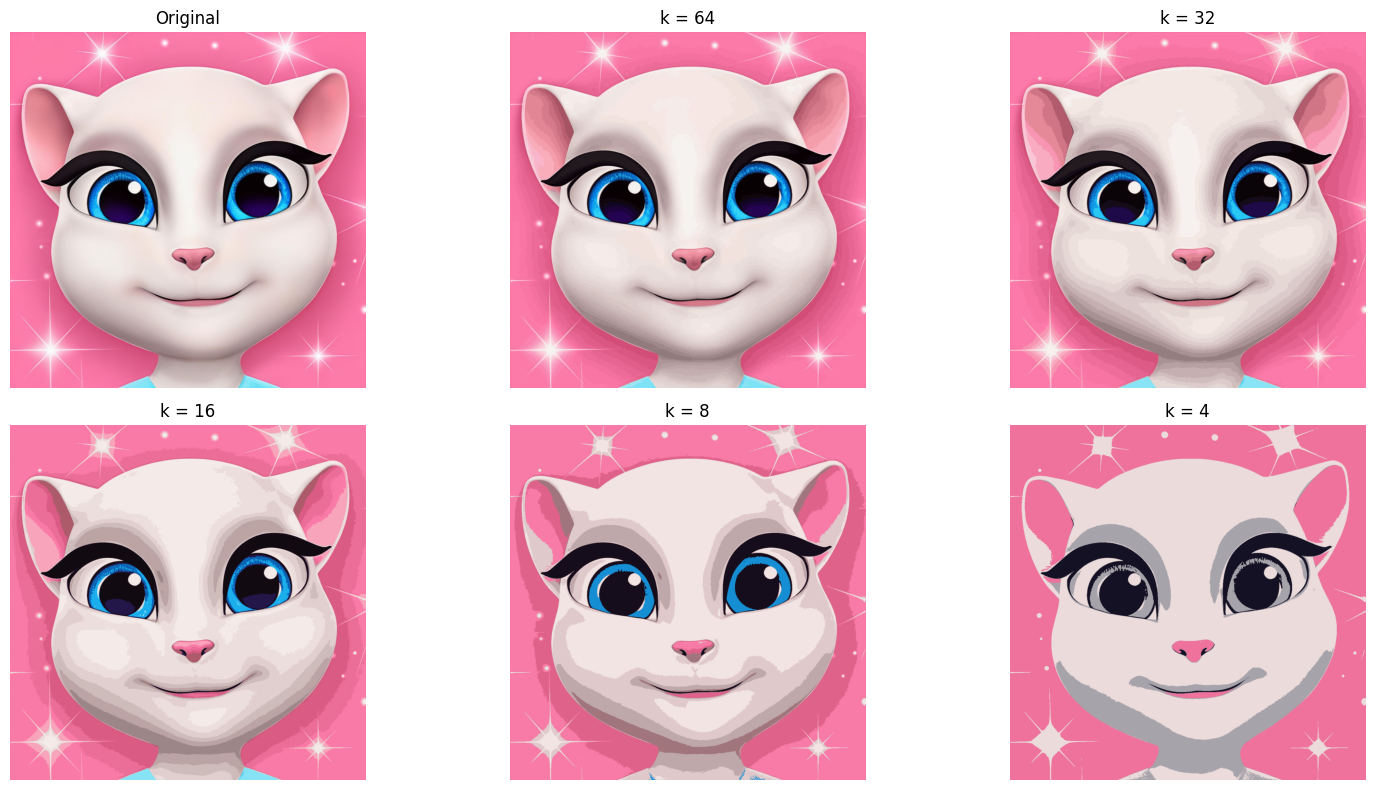

In [134]:
image = Image.open("/content/drive/MyDrive/Colab Notebooks/agela_v.jpg")
image = image.convert("RGB")
image_np = np.array(image)

pixels = image_np.reshape(-1, 3)

levels = [64, 32, 16, 8, 4]
quantized_images = []

for k in levels:
    print(f"Processing k = {k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    quantized_image = new_colors.reshape(image_np.shape).astype(np.uint8)
    quantized_images.append((k, quantized_image))

plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

for i, (k, q_img) in enumerate(quantized_images):
    plt.subplot(2, 3, i+2)
    plt.imshow(q_img)
    plt.title(f"k = {k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 11. Wordcount Text data

In [ ]:
#WARNING!!! Please remove children, pregnant women, the faint of heart, and anyone who hasn’t had dinner yet — things are about to get wild!

In [ ]:
#WARNING!!! Please remove children, pregnant women, the faint of heart, and anyone who hasn’t had dinner yet — things are about to get wild!

In [ ]:
#WARNING!!! Please remove children, pregnant women, the faint of heart, and anyone who hasn’t had dinner yet — things are about to get wild!

In [ ]:
#WARNING!!! Please remove children, pregnant women, the faint of heart, and anyone who hasn’t had dinner yet — things are about to get wild!

In [ ]:
#WARNING!!! Please remove children, pregnant women, the faint of heart, and anyone who hasn’t had dinner yet — things are about to get wild!

In [ ]:
#WARNING!!! Please remove children, pregnant women, the faint of heart, and anyone who hasn’t had dinner yet — things are about to get wild!

In [ ]:
#WARNING!!! Please remove children, pregnant women, the faint of heart, and anyone who hasn’t had dinner yet — things are about to get wild!

#**About Dataset**

https://www.kaggle.com/code/i0nlyaziz/suicide-and-depression-text-classification


**Context**

When I thought of building a text classifier to detect Suicide Ideation I couldn't find any public dataset. Hope this can be useful to anyone looking for suicide detection datasets and can save their time 💜.

**Content**

The dataset is a collection of posts from the "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021. All posts collected from SuicideWatch are labeled as suicide, While posts collected from the depression subreddit are labeled as depression. Non-suicide posts are collected from r/teenagers.

**Cite**

The dataset is originally published at Suicide Ideation Detection in Social Media Forums(https://ieeexplore.ieee.org/document/9591887)

**Version**

The current version has only suicide & non-suicide labels.
Version V13 has suicide, depression & teenagers(normal conversations) as labels.

**Collection**

A notebook is provided to show how posts from Reddit can be collected using PushShift API.

In [3]:
''' Read in the whole dataset '''
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Suicide_Detection.csv");

In [138]:
pd.set_option('display.max_colwidth', None)
df.head(10)

Unnamed: 0  \
0           2   
1           3   
2           4   
3           8   
4           9   
5          11   
6          12   
7          13   
8          16   
9          18   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

text        class
0  Ex Wife Threatening SuicideRecently I left my ...      suicide
1  Am I weird I don't get affected by compliments...  non-suicide
2  Finally 2020 is almost over... So I can never ...  non-suicide
3          i need helpjust help me im crying so hard      suicide
4  I’m so lostHello, my name is Adam (16) and I’v...      suicide

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [141]:
df.dtypes.value_counts()

object    2
Name: count, dtype: int64

In [142]:
df.describe()

text  \
count                                                                                                                                                                    232074   
unique                                                                                                                                                                   232074   
top     I still haven't beaten the first boss in Hollow Knight. I've only fought it a few times and I always die really early in the fight. I'm terrible at this game y'all. :(   
freq                                                                                                                                                                          1   

          class  
count    232074  
unique        2  
top     suicide  
freq     116037

In [143]:
df.shape

(232074, 2)

In [5]:
df['class'].unique()

array(['suicide', 'non-suicide'], dtype=object)

In [146]:
''' Get duplicates number '''
df.duplicated().sum()

np.int64(0)

#3. Dependence of input/output

In [147]:
df.head(10)

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Lets take a look at object columns

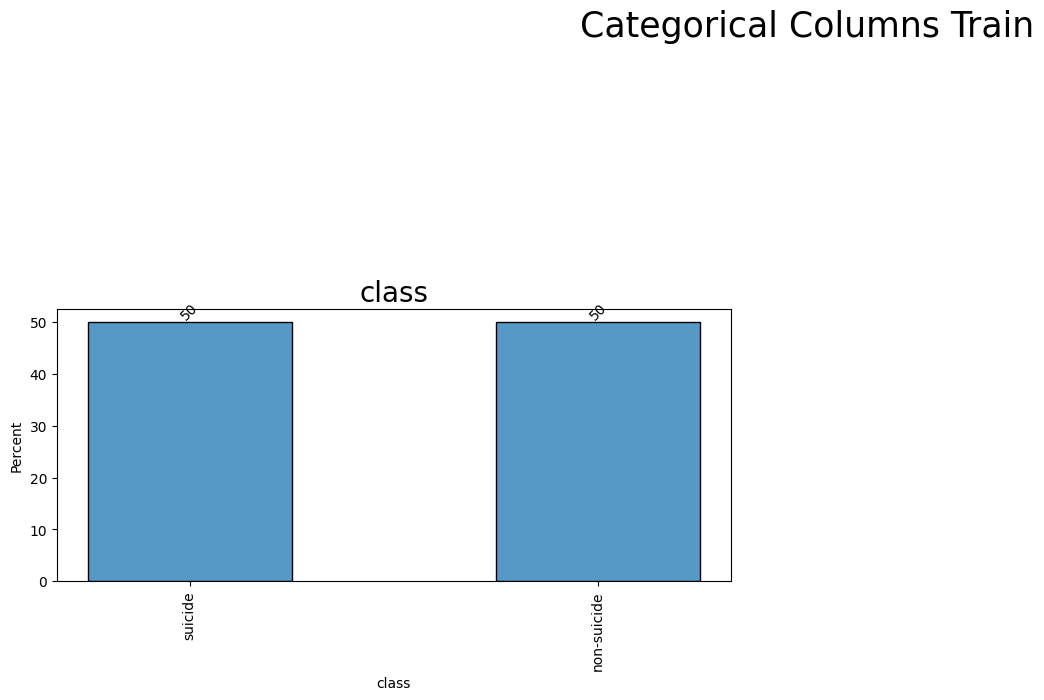

In [7]:
cat_cols = df.select_dtypes(include="object").columns

cols = ['class']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Train", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

#4. Detecting Outliers, NaN

In [8]:
df.shape

(232074, 2)

No outliers because its just text-class

Now lets examine NaN

In [9]:
df.isnull().sum()

text     0
class    0
dtype: int64

#5. Preprocessing (stopwords, case, punctuation)

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# before
pd.set_option('display.max_colwidth', None)
df.head(7)

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", " ", text)           # видаляє теги @username
    text = re.sub(r"https*\S+", " ", text)     # видаляє посилання
    text = re.sub(r"#\S+", " ", text)          # видаляє хештеги #tag
    text = re.sub(r"\d", " ", text)            # видаляє цифри
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)  # видаляє пунктуацію
    text = re.sub(r'\n', ' ', text)            # замінює перенос рядка на пробіл
    text = re.sub(r'\s{2,}',' ', text)         # замінює подвійні пробіли на один
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

# i admit that i copy-pasted this function from examples which proves i opened them and read

In [19]:
#after
df['clean_text'] = df['text'].apply(clean_text)

df.head(7)

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

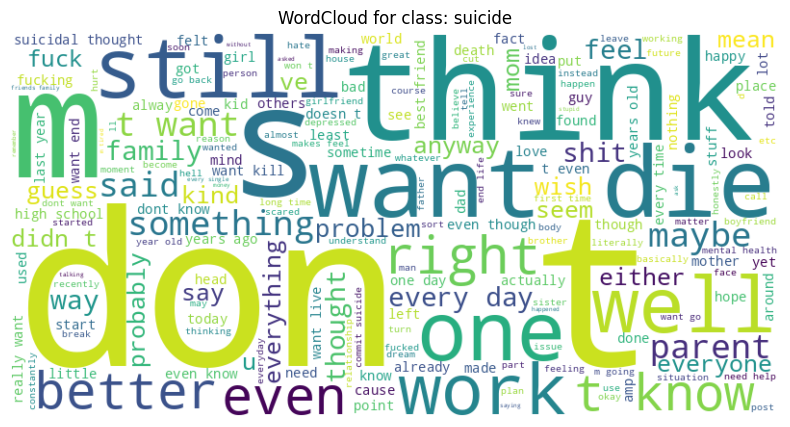

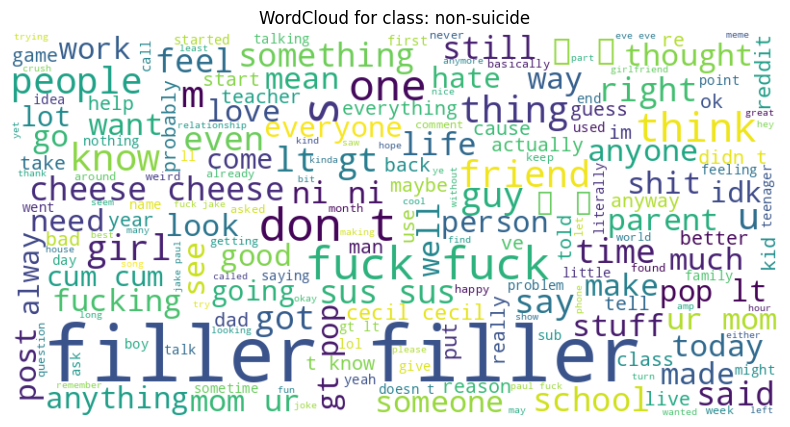

In [24]:
classes = df['class'].unique()

for cls in classes:
    text = ' '.join(df[df['class'] == cls]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for class: {cls}")
    plt.show()

# LabelEncoding and Vectorisation

In [27]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head(3)

text  \
0  Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again. I swear to fucking God it's so annoying   

   class  \
0      1   
1      0   
2      0   

                                                                                                                                                                                                                                                                                                                                                                                                           clean_text  
0  ex wife threatening suiciderecently left wife good cheated twice lied much decided refuse go back days ago began threatening suicide tirelessly spent paat days talking keeps hesitating wants believe come back know lot people threaten order get way happens really supposed handle death hands still love wife cannot deal getting cheated constantly feeling insecure worried today may day hope much happen   
1                                                                                                                                                                                                                                                                                                                          weird get affected compliments coming someone know irl feel really good internet strangers  
2                                                                                                                                                                                                                                                                                                                                                  finally almost never hear bad year ever swear fucking god annoying

In [37]:
X = df['clean_text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

In [45]:
vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#NAIVE BAYES

In [46]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

y_pred_nb_test = naive_bayes.predict(X_test_vec)
y_pred_nb_train = naive_bayes.predict(X_train_vec)

test_accuracy_nb = accuracy_score(y_test, y_pred_nb_test)
train_accuracy_nb = accuracy_score(y_train, y_pred_nb_train)

print(f'Accuracy of Naive Bayes on Train: {train_accuracy_nb:.8f}')
print(f'Accuracy of Naive Bayes on Test: {test_accuracy_nb:.8f}')

Accuracy of Naive Bayes on Train: 0.90347859
Accuracy of Naive Bayes on Test: 0.89329676


In [ ]:
#i didnt specify ngrams because with (1,2) the model is very bad at classifying class 1

In [52]:
print(naive_bayes.get_params())

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


In [47]:
print(y_test.to_numpy()[:200])

[1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0]


In [48]:
print(y_pred_nb_test[:200])

[1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0]


In [49]:
report = classification_report(y_test, y_pred_nb_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     34812
           1       0.84      0.97      0.90     34811

    accuracy                           0.89     69623
   macro avg       0.90      0.89      0.89     69623
weighted avg       0.90      0.89      0.89     69623



In [50]:
cf_matrix = confusion_matrix(y_test, y_pred_nb_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[28296  6516]
 [  913 33898]]
True Positives (TP): 33898
False Positives (FP): 6516
True Negatives (TN): 28296
False Negatives (FN): 913


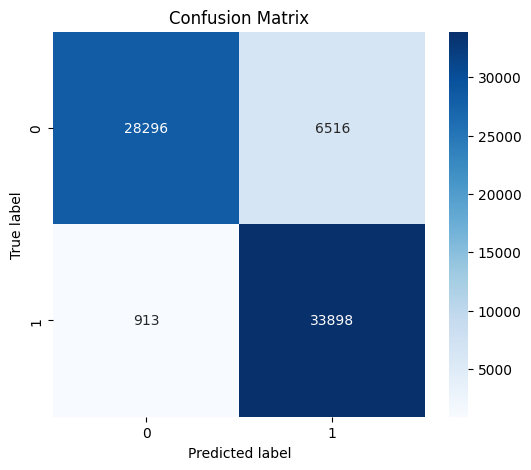

In [51]:
cm = confusion_matrix(y_test, y_pred_nb_test)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [53]:
from sklearn.metrics import classification_report

print("TRAIN:\n", classification_report(y_train, y_pred_nb_train))

print("TEST:\n", classification_report(y_test, y_pred_nb_test))

TRAIN:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90     81225
           1       0.85      0.98      0.91     81226

    accuracy                           0.90    162451
   macro avg       0.91      0.90      0.90    162451
weighted avg       0.91      0.90      0.90    162451

TEST:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     34812
           1       0.84      0.97      0.90     34811

    accuracy                           0.89     69623
   macro avg       0.90      0.89      0.89     69623
weighted avg       0.90      0.89      0.89     69623

